In [1]:
#import rpy2.robjects as robjects

# Rコマンドを実行してspatstatをインストール
#robjects.r('install.packages("spatstat", repos="https://cloud.r-project.org")')
#print("R package 'spatstat' has been installed successfully.")


In [6]:
data_Atlas = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
# インプットの項目数（行数 * カラム数）を返却します。
data_atlas=np.array(data_Atlas.values.tolist())
#print(data_Atlas.size)
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO

,id,graph_order,R,G,B
0,997,0,255,255,255
1,68,7,38,143,69
2,667,8,38,143,69
3,52192,9,38,143,69
4,52196,10,38,143,69
...,...,...,...,...,...
666,129,1299,170,170,170
667,140,1300,170,170,170
668,145,1301,170,170,170
669,153,1302,170,170,170


In [7]:
# 下記は一部のidだけが対象
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
0,997,root,root,0,"[255, 255, 255]",78620375,506.05289,155359.99590
1,8,grey,Basic cell groups and regions,1,"[191, 218, 227]",70525778,449.60086,156863.08540
2,567,CH,Cerebrum,2,"[176, 240, 255]",39291452,275.87673,142423.94190
3,688,CTX,Cerebral cortex,3,"[176, 255, 184]",31750427,221.54964,143310.66800
4,695,CTXpl,Cortical plate,4,"[112, 255, 112]",30687805,212.64380,144315.54300
...,...,...,...,...,...,...,...,...
834,129,V3,third ventricle,1299,"[170, 170, 170]",144614,0.90005,160673.85380
835,140,AQ,cerebral aqueduct,1300,"[170, 170, 170]",26972,0.40620,66400.27696
836,145,V4,fourth ventricle,1301,"[170, 170, 170]",118275,0.96495,122570.72070
837,153,V4r,lateral recess,1302,"[170, 170, 170]",71934,0.46333,155254.98260


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("../script/")
#from MergeBrain import WholeBrainCells
import matplotlib.pyplot as plt
import pandas as pd

import sys, os, os.path, re, csv, math
import linecache
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean,stdev
import seaborn as sns

import csv
import pprint
#import ants
import tifffile
from multiprocessing import Pool
import datetime
from itertools import product

import numpy as np
import tifffile
import os
import pickle
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import concurrent.futures
import gc
import json

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 20

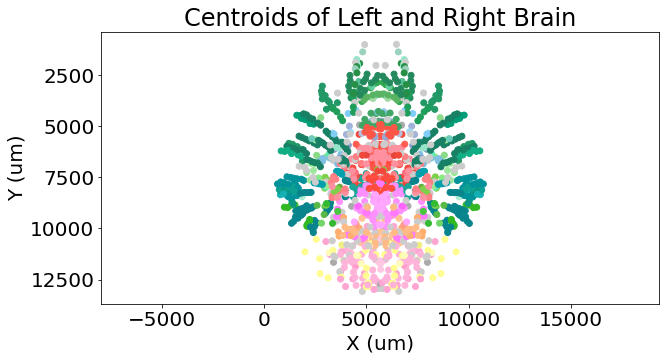

In [8]:
# whole brain plotをする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# バイナリファイルを読み込む
dt_type = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'), ('atlasID', 'u2')
])
grid_points = np.fromfile("/export3/Imaging/ds4_Data4/atlas/annotation_50_non_zero_coordinates.bin", dt_type)
grid_points = pd.DataFrame(grid_points)

# 左脳と右脳のデータを分割
left_points = grid_points[grid_points['X(um)'] < 5700]
right_points = grid_points[grid_points['X(um)'] >= 5700]

# atlasIDごとに重心を計算する関数
def calculate_centroids(df):
    centroids = df.groupby('atlasID').agg({'X(um)': 'mean', 'Y(um)': 'mean', 'Z(um)': 'mean'}).reset_index()
    return centroids

# 左脳と右脳の重心を計算
left_centroids = calculate_centroids(left_points)
right_centroids = calculate_centroids(right_points)

# 重心データを結合
all_centroids = pd.concat([left_centroids, right_centroids])



# 色情報の辞書を生成
color_dict = {row['id']: (row['R']/255, row['G']/255, row['B']/255) for index, row in data_GO.iterrows()}

# atlasIDに基づいて各点の色を決定
all_centroids['color'] = all_centroids['atlasID'].map(color_dict).apply(lambda x: x if isinstance(x, tuple) else (0.5, 0.5, 0.5))  # 色が見つからない場合は灰色

# xy座標をプロット（すべての重心を1つのプロットに表示）
plt.figure(figsize=(10, 5))
plt.scatter(all_centroids['X(um)'], all_centroids['Y(um)'], color=all_centroids['color'].tolist())
plt.title('Centroids of Left and Right Brain')
plt.xlabel('X (um)')
plt.ylabel('Y (um)')
plt.axis('equal')  # 軸を等方的にする
plt.gca().invert_yaxis()  # Y軸を反転
plt.show()


In [ ]:
# 方針変更
# WTとの比較の形で。
# 目下は、WT, APPのnearest neighbor距離を出して、保存
# それのthreshをmonthごとに考えて(下位1%とか)、それを満たすAPP cellを集計する方針で。
# atlas neuronではなく、microglia to microgliaにするか。したがって、new_arrayはそのsampleのmicrogliaが要素で。

In [ ]:
# nerest nighborをcell by cellで計算するか。。

In [5]:
conditions = {
    "WT_1m": ["#4_APPmodel_Ctr1m_1_2022_1104_1550","#4_APPmodel_Ctr1m_2_2022_1108_959","#4_APPmodel_Ctr1m_3_2022_1209_1751"],
   # "WT_2m": ["8w_B6JWT_atlas_1_2022_0924_1847","8w_B6JWT_atlas_2_2022_0926_1326", "8w_B6JWT_atlas_3_2022_1005_1110", "8w_B6JWT_atlas_4_2022_1010_2030","8w_B6JWT_atlas_5_2023_0423_1604",],
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605", "#4_APPmodel_Ctr3m_4_2023_0427_1444",],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
    "WT_7m": [ "#5_APPmodel_Ctr7m_1_2023_0206_1534","#5_APPmodel_Ctr7m_2_2023_0313_1111","#5_APPmodel_Ctr7m_3_2023_0331_2139","#4_APPmodel_Ctr7m_4_2023_0516_1559","#5_APPmodel_Ctr7m_5_2023_0522_2218"],
    "WT_9m": [ "#5_APPmodel_Ctr9m_1_2023_0130_1607", "#5_APPmodel_Ctr9m_2_2023_0216_2052" ,"#5_APPmodel_Ctr9m_3_2023_0322_2014","#5_APPmodel_Ctr9m_4_2023_0518_1449"],
    "WT_12m": ["56w_B6JWT_atlas_1_2022_1128_1548", "56w_B6JWT_atlas_2_2022_1221_1537", "56w_B6JWT_atlas_3_2022_1224_1718"],
    
    #  "WT_0.2m": ["#3_1w_B6JWT_atlas_1_2022_1103_2305","1w_B6JWT_atlas_2_2022_1219_1829", "1w_B6JWT_atlas_3_2022_1223_1719", "1w_B6JWT_atlas_4_2023_0105_1708"],
  # "WT_0.75m": ["3w_B6JWT_atlas_1_2022_0925_1526", "3w_B6JWT_atlas_2_2022_1004_928", "3w_B6JWT_atlas_3_2022_1017_2126", "3w_B6JWT_atlas_4_2022_1130_1051"],
    "APP_1m": ["#4_APPmodel_APP1m_1_2022_1102_1304", "#4_APPmodel_APP1m_2_2022_1106_1708","#4_APPmodel_APP1m_3_2022_1213_2151","#4_APPmodel_APP1m_4_2023_0417_2052", ],
    "APP_3m": [ "#5_APPmodel_APP3m_2_2023_0123_1645", "#5_APPmodel_APP3m_3_2023_0212_2217","#5_APPmodel_APP3m_4_2023_0214_2027","#4_APPmodel_APP3m_5_2023_0502_1423",],
   "APP_5m": ["#4_APPmodel_APP5m_1_2022_1024_1336", "#4_APPmodel_APP5m_2_2022_1027_1333","#4_APPmodel_APP5m_3_2022_1030_1257", "#4_APPmodel_APP5m_4_2023_0509_1021"],
    "APP_7m": ["#5_APPmodel_APP7m_2_2023_0315_1540","#5_APPmodel_APP7m_3_2023_0310_1401","#5_APPmodel_APP7m_4_2023_0317_1630", "#5_APPmodel_APP7m_5_2023_0520_1723"],
    "APP_9m": ["#5_APPmodel_APP9m_1_2023_0117_1352","#5_APPmodel_APP9m_2_2023_0327_1425", "#5_APPmodel_APP9m_3_2023_0329_1611", "#5_APPmodel_APP9m_4_2023_0403_1443" ],
      

  
  #  "VCP_mut_2m": ["VCPmodel_E524A_0.5x_1_2022_0624_1303", "VCPmodel_E524A_0.5x_2_2022_0626_1338", "VCPmodel_E524A_0.5x_4_2022_0922_1217", "VCPmodel_E524A_0.5x_6_2022_0628_1157"], 
  # "VCP_WT_2m": ["VCPmodel_WT_0.5x_1_2022_0625_1104","VCPmodel_WT_0.5x_2_2022_0917_1808", "VCPmodel_WT_0.5x_3_2022_0627_1257", "VCPmodel_WT_0.5x_4_2022_0921_950","VCPmodel_WT_0.5x_5_2022_0923_1454","VCPmodel_WT_0.5x_6_2022_0929_953"],
  #  "newVCP_mut_2m": ["#5_VCPmodel_E524A_0.5x_1_2023_0120_1929","#5_VCPmodel_E524A_0.5x_2_2023_0407_1031", "#5_VCPmodel_E524A_0.5x_3_2023_0413_2036"], 
  # "newVCP_WT_2m": ["#5_VCPmodel_WT_0.5x_1_2023_0405_1108","#5_VCPmodel_WT_0.5x_2_2023_0115_1852","#5_VCPmodel_WT_0.5x_3_2023_0410_1246"], 
    
  #  "TMT_2m": ["#3_TMTmodel_TMT3.0_8w_1_2022_1014_1410", "#3_TMTmodel_TMT3.0_8w_2_2022_1020_938", "#3_TMTmodel_TMT3.0_8w_3_2022_1023_501", "#3_TMTmodel_TMT_8w_5_2022_1205_1147",],
  #"Saline_2m": ["#3_TMTmodel_Saline_8w_1_2022_1016_1318", "#3_TMTmodel_Saline_8w_2_2022_1018_2103","#3_TMTmodel_Saline_8w_3_2022_1021_1910", "#3_TMTmodel_Saline_8w_4_2022_1202_1349", "#3_TMTmodel_Saline_8w_5_2022_1217_1723", "#3_TMTmodel_Saline_8w_6_2022_1216_001"],
    
}

In [9]:
# SCA の Neuronal cellome を読み出し。

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )
grid_points_ori ["id"] = range(len(grid_points_ori ))

# NeuN+ だけにする。
grid_points_modified = grid_points_ori[grid_points_ori["NeuN_positive"]>0].copy()
#print(grid_points_modified.index)
grid_points_modified.reset_index(drop=True, inplace=True)

grid_points_modified_df =  pd.DataFrame({
            'x': grid_points_modified["X(um)"],
            'y': grid_points_modified["Y(um)"],
            'z': grid_points_modified["Z(um)"]
        }) 

#del grid_points_ori
#gc.collect()

In [11]:
grid_points_ori

,X(um),Y(um),Z(um),NeuN_positive,Iba1_positive,atlasID,id
0,3597.007812,13127.427734,4136.107910,1.0,1.0,1025,0
1,3620.634521,13124.392578,4133.352051,0.0,0.0,1025,1
2,3622.308350,13137.600586,4115.510742,1.0,1.0,1025,2
3,3587.423828,13136.514648,4117.138672,1.0,1.0,1025,3
4,3659.266357,13119.145508,4125.502930,0.0,0.0,1025,4
...,...,...,...,...,...,...,...
92873696,7428.811523,748.121277,4478.739258,1.0,1.0,1016,92873696
92873697,7466.353516,742.775085,4489.860840,1.0,1.0,1016,92873697
92873698,7443.677734,748.060974,4487.812500,1.0,1.0,1016,92873698
92873699,7430.818848,744.542664,4494.719727,1.0,1.0,1016,92873699


In [6]:
grid_points_modified_df

,x,y,z
0,3597.007812,13127.427734,4136.107910
1,3622.308350,13137.600586,4115.510742
2,3587.423828,13136.514648,4117.138672
3,3596.068604,13148.958008,4097.547363
4,3605.068848,13148.184570,4095.741699
...,...,...,...
51614568,7428.811523,748.121277,4478.739258
51614569,7466.353516,742.775085,4489.860840
51614570,7443.677734,748.060974,4487.812500
51614571,7430.818848,744.542664,4494.719727


In [59]:
# まずは、SCA上の50 um scale voxelごとのデータを集計し、保存
# ドーナツ保存　→ futureではmemoryが消せないかも

from scipy.spatial import cKDTree
from concurrent.futures import ThreadPoolExecutor, as_completed
import random
from sklearn.neighbors import BallTree
from multiprocessing import Process, Array, Lock

dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])

dt_simple2 = np.dtype([
    ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'), 
    ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

dt_voxel2 = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um_0_10um', 'u4'),
    ('NeuN_neighbor_r_100um_10_20um', 'u4'),
    ('NeuN_neighbor_r_100um_20_30um', 'u4'),
    ('NeuN_neighbor_r_100um_30_40um', 'u4'),
    ('NeuN_neighbor_r_100um_40_50um', 'u4'),
    ('NeuN_neighbor_r_100um_50_60um', 'u4'),
    ('NeuN_neighbor_r_100um_60_70um', 'u4'),
    ('NeuN_neighbor_r_100um_70_80um', 'u4'),
    ('NeuN_neighbor_r_100um_80_90um', 'u4'),
    ('NeuN_neighbor_r_100um_90_100um', 'u4'),
    ('atlasID', 'u2')
])

data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# data_GO["id"]のユニークな値を取得
ids = data_GO["id"].astype(int)
ids=np.array(ids)

NeuN_cluster_threshold_list = [0.80] # だいたいが0.75のはず
NeuN_cluster_noise_threshold_list = [0.55] # だいたいが0.75のはず
Iba1_cluster_threshold_list = [0.55] # だいたいが0.45のはず

import math


all_paths = [path for paths in conditions.values() for path in paths]
#all_paths = ["1w_B6JWT_atlas_2_2022_1219_1829"]

for Sample in all_paths:
    #Sample = "#5_VCPmodel_E524A_0.5x_1_2023_0120_1929"

    # stitching後 & ANTs後のcellome情報を読み出し
    print("\n")
    start_time = datetime.datetime.now()
    start_time2 = datetime.datetime.now()
    print("Start time:", start_time)

    param_path = "/home/mitani/CUBIC-informatics/param/Neuronomics/" + Sample + "/param_multichannel-rank.json"

    print(param_path)

    try:
    #if 1==1:
        with open(param_path) as f:
            param = json.load(f)

        fw_dir_nu = param["dst_basedir"]

        # done.txtの存在を確認
        #if not os.path.exists(fw_dir_nu + "/Neuronal_cellome_ring_done_2.txt"):
            # regional_cellome_done.txtが存在しない場合、集計処理を実行
        #    print("Neuronal_cellome_ring_done_2.txt does not exist. So, start to calculate regional cellome.")
        #else:
        #    print("Neuronal_cellome_ring_done_2.txt is existing. So skip.")
        #    continue

        # done.txtの存在を確認
        if not os.path.exists(fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt"):
            # regional_cellome_done.txtが存在しない場合、集計処理を実行
            print("Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt does not exist. So, start to calculate regional cellome.")
        else:
            print("Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt is existing. So skip.")
            continue

        print("### Read parameter file ###")

        SCA_cells = np.fromfile(fw_dir_nu + "/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)

        print(len(SCA_cells))

        Classified_cells = np.fromfile(fw_dir_nu + "/For_PDF_clustering_base_data_classified_NeuN_" + str(NeuN_cluster_threshold_list[0]) +
                 "_noise_"+str(NeuN_cluster_noise_threshold_list[0]) +
                 "_Iba1_" +str(Iba1_cluster_threshold_list[0])  +"_2.bin", dtype = dt_simple2 )
        print(len(Classified_cells))

        SCA_data = np.zeros((len(SCA_cells),), dtype=dt_SCA)
        SCA_data["SCA_x"] = SCA_cells["SCA_x"] # um scaleである
        SCA_data["SCA_y"] = SCA_cells["SCA_y"]
        SCA_data["SCA_z"] = SCA_cells["SCA_z"]

        SCA_data["NeuN_positive"] = Classified_cells['NeuN_positive']
        SCA_data["Iba1_positive"] = Classified_cells['Iba1_positive']

        SCA_data["atlas_id"] = SCA_cells["atlas_id"]

        del SCA_cells, Classified_cells
        gc.collect()

        SCA_data = pd.DataFrame(SCA_data[SCA_data["atlas_id"]>0]) # mis registrationを除くため

        print(len(SCA_data))


        # 2
        #NeuN_cell_coordinates_df = pd.DataFrame({
        #    'x': SCA_data["SCA_x"][SCA_data["NeuN_positive"]>0],
        #    'y': SCA_data["SCA_y"][SCA_data["NeuN_positive"]>0],
        #    'z': SCA_data["SCA_z"][SCA_data["NeuN_positive"]>0]
        #})

        # 6では、simpleにこうする。
        NeuN_cell_coordinates_df = pd.DataFrame({
            'x': SCA_data["SCA_x"][(SCA_data["Iba1_positive"]>0)],
            'y': SCA_data["SCA_y"][(SCA_data["Iba1_positive"]>0)],
            'z': SCA_data["SCA_z"][(SCA_data["Iba1_positive"]>0)]
        })    
        
        grid_points_modified_df =  pd.DataFrame({
            'x': NeuN_cell_coordinates_df["x"],
            'y': NeuN_cell_coordinates_df["y"],
            'z': NeuN_cell_coordinates_df["z"],
            'atlas_id': SCA_data["atlas_id"][(SCA_data["Iba1_positive"]>0)]
        })
        
        print(len(NeuN_cell_coordinates_df))

        del SCA_data
        gc.collect()



        # z範囲の自動生成
        def create_z_ranges(start, end, step):
            return [(i, i+step) for i in range(start, end, step)]

        # 範囲のパラメータを設定
        start_z =0
        end_z = 8000
        step_z = 8000

        # z範囲を生成
        z_ranges = create_z_ranges(start_z, end_z, step_z)
        random.shuffle(z_ranges)
        print(z_ranges)

        start_time = datetime.datetime.now()
        print("KDtree Start time:", start_time)

        buffer = 101  # 100 um buffer

        # ロックの作成
        lock = Lock()

        def process_z_range(indices, target_data, tree_data, shared_distances, lock):
            if target_data.empty or tree_data.empty:
                print("Empty data provided. Skipping processing for this chunk.")
                return #indices, []

            try:
                start_time3 = datetime.datetime.now()
                print("Z: " + str(np.min(target_data['z'])) + "_KDtree chunk Start time:", start_time3)

                tree = BallTree(tree_data[['x', 'y', 'z']].values)
                #indices_lst, distances = tree.query_radius(target_data[['x', 'y', 'z']].values, r=100.0, return_distance=True)
                distances, indices_tree = tree.query(target_data[['x', 'y', 'z']].values, k=2)  # k=1 for nearest neighbor
                
                #distances_counts = [len(distance) for distance in distances]

                # Converting each list of distances to a numpy array
                #distances = [np.array(dist, dtype=float) for dist in distances if len(dist) > 0]

                #print("Total number of distances:", sum(len(dist) for dist in distances))
                #print(distances_counts)
                #print("distances" + str(np.sum(distances_counts)))
                del tree, #indices_lst
                gc.collect()



                #end_time = datetime.datetime.now()
                #print("Z: " + str(np.min(target_data['z'])) + " KDtree chunk End time:", end_time)
                #print("Duration:", end_time - start_time3)

                # ヒストグラムの計算
                #bins = np.arange(0, 100 + 10, 10)  # 例: 0, 10, 20, ..., 100
                #counts = np.array([np.histogram(dist, bins=bins)[0] for dist in distances_])
                #counts = len(indices_lst)#[np.histogram(dist, bins=bins)[0] for dist in distances if dist.size > 0]

                #print(len(counts))

                #print("counts: " + str(np.sum(counts, axis=0)))
                #print(np.sum(counts)/len(target_data))

                #del distances, bins
                #gc.collect()
                # データを共有メモリに書き込む前にロックを取得
                print(distances[0:10])
                with lock:
                    for i, distance_set in enumerate(distances):
                        if len(distance_set) > 1:  # 最低限2つの距離が存在することを確認
                            shared_distances[i] = distance_set[1]  # 最近傍点ではなく、次に近い点の距離を使用
                        else:
                            shared_distances[i] = np.inf
                print(f"Shared distances (sample): {shared_distances[:10]}")
                            
                del   distances
                gc.collect()

                end_time = datetime.datetime.now()
                print("Z: " + str(np.min(target_data['z'])) + "_KDtree chunk End time:", end_time)
                print("Duration:", end_time - start_time3)

                #return indices, neighbor_counts
            except Exception as e:
                print(f"Error processing KDTree: {e}")
                return #indices, []


        # ツリーデータを範囲ごとにフィルタリング
        tree_data_by_range = [
            NeuN_cell_coordinates_df[(NeuN_cell_coordinates_df['z'] >= z_min - buffer) & (NeuN_cell_coordinates_df['z'] <= z_max + buffer)]
            for z_min, z_max in z_ranges
        ]

        # ターゲットデータの範囲ごとのインデックスとデータを計算
        target_data_by_range = [
            grid_points_modified_df[(grid_points_modified_df['z'] >= z_min) & (grid_points_modified_df['z'] <= z_max)]
            for z_min, z_max in z_ranges
        ]

        # 全体の結果を格納するための配列を範囲ごとに準備
        shared_counts = []
        shared_counts = Array('f', len(grid_points_modified_df) * 1) 
        all_neighbor_counts = np.zeros((len(grid_points_modified_df), ), dtype=float)  # 10個の距離範囲ごと

        max_workers = 10
        # プロセスの生成と管理
        processes = []


        for target_data, tree_data in zip(target_data_by_range, tree_data_by_range):
            p = Process(target=process_z_range, args=(target_data.index, target_data, tree_data, shared_counts, lock))
            p.start()
            processes.append(p)
            if len(processes) >= max_workers:
                for p in processes:
                    p.join()
                processes = []

        # 残りのプロセスの終了を待つ
        for p in processes:
            p.join()

        # 共有メモリから最終的な結果を取得
        all_neighbor_counts = np.ctypeslib.as_array(shared_counts.get_obj()).reshape((len(grid_points_modified_df), ))

        print(all_neighbor_counts)

        end_time = datetime.datetime.now()
        print("All KDtree End time:", end_time)
        print("Duration:", end_time - start_time)

        #grid_points_modified_df["NeuN_neighbor_r_100um"] = all_neighbor_counts

        del tree_data_by_range, target_data_by_range
        gc.collect()

        new_array = np.empty((len(grid_points_modified_df),), dtype=dt_voxel)

        new_array["X(um)"] = grid_points_modified_df["x"]
        new_array["Y(um)"] = grid_points_modified_df["y"]
        new_array["Z(um)"] = grid_points_modified_df["z"]
        new_array["NeuN_neighbor_r_100um"] = all_neighbor_counts #grid_points_modified_df["NeuN_neighbor_r_100um"]
        new_array["atlasID"] = grid_points_modified_df['atlas_id']


        print(len(new_array))

        #if 1==0:
        #new_array.tofile(fw_dir_nu + "/Neuronal_cellome_ring_2.bin")
        new_array.tofile(fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_Iba1_1.bin")

        print("Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.")
        
        # 3D画像の元のサイズ
        depth_ori = int(np.round(800 / 2.5))
        height_ori = int(np.round(1320 /2.5))
        width_ori = int(np.round(1140 /2.5))

        # 空の3D配列（画像）を作成
        image_3d = np.zeros((depth_ori, height_ori, width_ori), dtype=np.float32)

        # nearest_id が 0 より大きい行のみを選択
        filtered_df = new_array[new_array['NeuN_neighbor_r_100um'] > 0]

        # z_indices が 0<= z <320
        # y_indices が 0 <= y <528
        # x_indices が 0 <= x < 456 を満たすようにfilterする必要あり。
        # x, y, z 列を整数のNumPy配列に変換し、インデックス用に使用
        z_indices = (filtered_df['Z(um)']* (1/25)).astype(int)
        y_indices = (filtered_df['Y(um)']* (1/25)).astype(int)
        x_indices = (filtered_df['X(um)']* (1/25)).astype(int)

        mask = (z_indices < depth_ori) & (z_indices >= 0) & (y_indices < height_ori) & (y_indices >= 0) & (x_indices < width_ori) & (x_indices >= 0)
        
        # フィルタリングを適用
        z_indices = z_indices[mask]
        y_indices = y_indices[mask]
        x_indices = x_indices[mask]
        ids = filtered_df['NeuN_neighbor_r_100um'][mask].astype(np.float32)

        # 高度なインデクシングを使用して3D画像にIDを割り当て
        image_3d[z_indices, y_indices, x_indices] = ids

        # Save the 3D array as a TIFF file
        img_filename_Nuclear_Isocortex_to_ori =   f"/export2/Imaging/ds4_Data4/Cellome/{Sample}_newIba1_25um_NearestNeighbor_distance.tif"
        tifffile.imsave(img_filename_Nuclear_Isocortex_to_ori, image_3d.astype(np.float32))

        del image_3d, z_indices, y_indices, x_indices, ids
        gc.collect()

        del NeuN_cell_coordinates_df, grid_points_modified_df, new_array, all_neighbor_counts, shared_counts
        gc.collect()

        # CSVファイルの保存後、done.txtを作成
        #with open(fw_dir_nu + "/Neuronal_cellome_ring_done_2.txt", 'w') as f:
        #    f.write("done\n")
        #print("Neuronal_cellome_ring_done_2.txt file's save has done.")

        with open(fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt", 'w') as f:
            f.write("done\n")
        print("Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file's save has done.")

        end_time = datetime.datetime.now()
        print("End time:", end_time)
        print("Duration:", end_time - start_time)
    except:
        print("SCA or PDFcluster file does not exist. Skip this time.")



Start time: 2024-12-16 22:16:39.901327
/home/mitani/CUBIC-informatics/param/Neuronomics/#4_APPmodel_Ctr1m_1_2022_1104_1550/param_multichannel-rank.json
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt is existing. So skip.


Start time: 2024-12-16 22:16:39.902770
/home/mitani/CUBIC-informatics/param/Neuronomics/#4_APPmodel_Ctr1m_2_2022_1108_959/param_multichannel-rank.json
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt does not exist. So, start to calculate regional cellome.
### Read parameter file ###
99629686
99629686
93607724
3459977
[(0, 8000)]
KDtree Start time: 2024-12-16 22:17:06.801106
Z: 160.40776_KDtree chunk Start time: 2024-12-16 22:17:07.098238
[[ 0.          2.9739255 ]
 [ 0.          9.05998511]
 [ 0.          9.05998511]
 [ 0.          7.56752648]
 [ 0.         13.41184422]
 [ 0.         13.40003627]
 [ 0.         11.07294907]
 [ 0.         13.0227791 ]
 [ 0.          8.39384876]
 [ 0.          7.68520043]]
Shared distances (sample): [2.9739255905151367, 9.059985160

Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file's save has done.
End time: 2024-12-16 22:26:28.187358
Duration: 0:00:54.867555


Start time: 2024-12-16 22:26:28.188754
/home/mitani/CUBIC-informatics/param/Neuronomics/#4_APPmodel_Ctr5m_1_2022_1026_252/param_multichannel-rank.json
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt is existing. So skip.


Start time: 2024-12-16 22:26:28.189951
/home/mitani/CUBIC-informatics/param/Neuronomics/#4_APPmodel_Ctr5m_2_2022_1028_2336/param_multichannel-rank.json
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt does not exist. So, start to calculate regional cellome.
### Read parameter file ###
99975170
99975170
95355166
2825941
[(0, 8000)]
KDtree Start time: 2024-12-16 22:26:46.685497
Z: 160.09114_KDtree chunk Start time: 2024-12-16 22:26:47.007977
[[ 0.         92.00459016]
 [ 0.          4.53065522]
 [ 0.         16.92436284]
 [ 0.         22.78920793]
 [ 0.         40.32597406]
 [ 

Z: 160.06532_KDtree chunk Start time: 2024-12-16 22:44:09.700484
[[ 0.         14.58577502]
 [ 0.         14.58577502]
 [ 0.         14.59281274]
 [ 0.          6.24302403]
 [ 0.         13.52223335]
 [ 0.         33.74010076]
 [ 0.          5.07910636]
 [ 0.          5.86837257]
 [ 0.          5.84954666]
 [ 0.         31.51334706]]
Shared distances (sample): [14.585775375366211, 14.585775375366211, 14.592812538146973, 6.243023872375488, 13.522233009338379, 33.7401008605957, 5.079106330871582, 5.868372440338135, 5.849546432495117, 31.513347625732422]
Z: 160.06532_KDtree chunk End time: 2024-12-16 22:45:12.010778
Duration: 0:01:02.310294
[14.585775 14.585775 14.592813 ... 42.254837 35.005367 30.028461]
All KDtree End time: 2024-12-16 22:45:12.134800
Duration: 0:01:02.688688
2980867
Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file's save has done.
End time: 2024-12-16 22:45:14.102904
Duration: 0:01:04.656792


Start time: 2

Z: 160.08781_KDtree chunk Start time: 2024-12-16 22:55:51.276172
[[ 0.         34.84058491]
 [ 0.         18.87194386]
 [ 0.         28.84893465]
 [ 0.         15.63070805]
 [ 0.         29.95912352]
 [ 0.         15.63070805]
 [ 0.         28.84893465]
 [ 0.         29.95912352]
 [ 0.         16.53543257]
 [ 0.          9.06688531]]
Shared distances (sample): [34.84058380126953, 18.871944427490234, 28.848934173583984, 15.630707740783691, 29.959123611450195, 15.630707740783691, 28.848934173583984, 29.959123611450195, 16.535432815551758, 9.066884994506836]
Z: 160.08781_KDtree chunk End time: 2024-12-16 22:57:07.122617
Duration: 0:01:15.846445
[34.840584 18.871944 28.848934 ... 26.655416 52.18333  52.18333 ]
All KDtree End time: 2024-12-16 22:57:07.256242
Duration: 0:01:16.321511
3276282
Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file's save has done.
End time: 2024-12-16 22:57:09.338064
Duration: 0:01:18.403333


Start tim

102141674
102141674
96639231
3038205
[(0, 8000)]
KDtree Start time: 2024-12-16 23:05:33.437319
Z: 160.02657_KDtree chunk Start time: 2024-12-16 23:05:33.684176
[[ 0.         41.90957217]
 [ 0.         13.61099952]
 [ 0.          7.70676629]
 [ 0.          7.70676629]
 [ 0.         32.39959589]
 [ 0.          7.00695112]
 [ 0.          7.00695112]
 [ 0.         26.24933   ]
 [ 0.         26.24933   ]
 [ 0.         27.54587497]]
Shared distances (sample): [41.90957260131836, 13.61099910736084, 7.706766128540039, 7.706766128540039, 32.39959716796875, 7.006951332092285, 7.006951332092285, 26.249330520629883, 26.249330520629883, 27.545875549316406]
Z: 160.02657_KDtree chunk End time: 2024-12-16 23:06:35.137943
Duration: 0:01:01.453767
[41.909573 13.610999  7.706766 ... 15.873373 28.77531  26.486938]
All KDtree End time: 2024-12-16 23:06:35.256272
Duration: 0:01:01.818953
3038205
Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file'

112710306
112710306
107410876
3331740
[(0, 8000)]
KDtree Start time: 2024-12-16 23:15:30.016901
Z: 160.0312_KDtree chunk Start time: 2024-12-16 23:15:30.307140
[[ 0.         49.94895479]
 [ 0.          7.17890138]
 [ 0.         51.48906587]
 [ 0.         14.07377893]
 [ 0.          7.17890138]
 [ 0.         39.72597736]
 [ 0.          8.80350866]
 [ 0.          8.80350866]
 [ 0.         13.96936362]
 [ 0.         11.35595818]]
Shared distances (sample): [49.94895553588867, 7.178901195526123, 51.48906707763672, 14.073779106140137, 7.178901195526123, 39.72597885131836, 8.803508758544922, 8.803508758544922, 13.96936321258545, 11.355957984924316]
Z: 160.0312_KDtree chunk End time: 2024-12-16 23:16:43.069739
Duration: 0:01:12.762599
[49.948956  7.178901 51.489067 ... 49.03018  16.030537 42.676975]
All KDtree End time: 2024-12-16 23:16:43.191795
Duration: 0:01:13.174894
3331740
Neuronal_cellome_NearestNeighbor_Iba1_1.bin save has done.
Neuronal_cellome_NearestNeighbor_done_Iba1_1.txt file's 

In [ ]:
# 同じ月齢のCtrのsample dataを読み出してまずは、ミクログリアデータを連結して保存する。sample nameもcolumnに入れる。
# 同じ月齢のAPPのsample dataを読み出してまずは、ミクログリアデータを連結して保存する。sample nameもcolumnに入れる。

In [62]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_Iba1_1.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                data =  np.fromfile(cellome_file, dtype=dt_voxel) #pd.read_csv(cellome_file)
                df = pd.DataFrame(data)
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df_list.append(df)
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m", "WT_3m","WT_5m", "WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]

healthy_data = load_data(healthy_sample_info)
#disease_data = load_data(disease_sample_info)

healthy_data['Age'] = healthy_data['Condition'].str.extract('(\d+)m').astype(int)
healthy_data['Genetic'] = 1  # Diseaseは1

all_data = healthy_data

all_data['log_All_cell_count'] = 0


#4_APPmodel_Ctr1m_1_2022_1104_1550
#4_APPmodel_Ctr1m_2_2022_1108_959
#4_APPmodel_Ctr1m_3_2022_1209_1751
#5_APPmodel_Ctr3m_1_2023_0113_1230
#5_APPmodel_Ctr3m_2_2023_0210_1142
#5_APPmodel_Ctr3m_3_2023_0227_1605
#4_APPmodel_Ctr3m_4_2023_0427_1444
#4_APPmodel_Ctr5m_1_2022_1026_252
#4_APPmodel_Ctr5m_2_2022_1028_2336
#4_APPmodel_Ctr5m_3_2022_1101_140
#4_APPmodel_Ctr5m_4_2023_0512_2057
#5_APPmodel_Ctr7m_1_2023_0206_1534
#5_APPmodel_Ctr7m_2_2023_0313_1111
#5_APPmodel_Ctr7m_3_2023_0331_2139
#4_APPmodel_Ctr7m_4_2023_0516_1559
#5_APPmodel_Ctr7m_5_2023_0522_2218
#5_APPmodel_Ctr9m_1_2023_0130_1607
#5_APPmodel_Ctr9m_2_2023_0216_2052
#5_APPmodel_Ctr9m_3_2023_0322_2014
#5_APPmodel_Ctr9m_4_2023_0518_1449


In [70]:
dt_voxel3 = np.dtype([
    ('X(um)', 'f4'),
    ('Y(um)', 'f4'),
    ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um', 'f4'),
    ('atlasID',  'u2'),
    
    ('Condition', 'U50'),
    ('Sample', 'U50'),
    ('Age', 'u2'),
    ('Genetic', 'u2'),
    ('log_All_cell_count', 'f4')
])

# DataFrameをNumPy配列に変換
new_array = np.empty((len(all_data),), dtype=dt_voxel3)

new_array["X(um)"] = all_data["X(um)"]
new_array["Y(um)"] = all_data["Y(um)"]
new_array["Z(um)"] = all_data["Z(um)"]
new_array["NeuN_neighbor_r_100um"] = all_data["NeuN_neighbor_r_100um"]
new_array["atlasID"] = all_data["atlasID"]

new_array["Condition"] = all_data["Condition"]
new_array["Sample"] = all_data["Sample"]
new_array["Age"] = all_data["Age"]
new_array["Genetic"] = all_data["Genetic"]
new_array["log_All_cell_count"] = all_data["log_All_cell_count"]

new_array.tofile('/export2/Imaging/ds4_Data4/Cellome/WT_NearestNeighbor_Iba1.bin')

In [71]:
new_array

array([(5006.874 , 13166.048  , 2709.4392, 18.388208 ,  944, 'WT_1m', '#4_APPmodel_Ctr1m_1_2022_1104_1550', 1, 1, 0.),
       (5024.7974, 13165.909  , 2705.333 , 18.388208 ,  944, 'WT_1m', '#4_APPmodel_Ctr1m_1_2022_1104_1550', 1, 1, 0.),
       (4878.3438, 13169.775  , 2662.725 , 42.770267 ,  944, 'WT_1m', '#4_APPmodel_Ctr1m_1_2022_1104_1550', 1, 1, 0.),
       ...,
       (7252.7334,   279.98325, 3958.9077, 19.496952 , 1016, 'WT_9m', '#5_APPmodel_Ctr9m_4_2023_0518_1449', 9, 1, 0.),
       (7307.388 ,   298.60574, 3989.826 , 46.34651  , 1016, 'WT_9m', '#5_APPmodel_Ctr9m_4_2023_0518_1449', 9, 1, 0.),
       (7289.4546,   294.60608, 4032.3872, 10.1655855, 1016, 'WT_9m', '#5_APPmodel_Ctr9m_4_2023_0518_1449', 9, 1, 0.)],
      dtype=[('X(um)', '<f4'), ('Y(um)', '<f4'), ('Z(um)', '<f4'), ('NeuN_neighbor_r_100um', '<f4'), ('atlasID', '<u2'), ('Condition', '<U50'), ('Sample', '<U50'), ('Age', '<u2'), ('Genetic', '<u2'), ('log_All_cell_count', '<f4')])

In [63]:
all_data

,X(um),Y(um),Z(um),NeuN_neighbor_r_100um,atlasID,Condition,Sample,Age,Genetic,log_All_cell_count
0,5006.874023,13166.047852,2709.439209,18.388208,944,WT_1m,#4_APPmodel_Ctr1m_1_2022_1104_1550,1,1,0
1,5024.797363,13165.909180,2705.333008,18.388208,944,WT_1m,#4_APPmodel_Ctr1m_1_2022_1104_1550,1,1,0
2,4878.343750,13169.775391,2662.725098,42.770267,944,WT_1m,#4_APPmodel_Ctr1m_1_2022_1104_1550,1,1,0
3,4781.061035,13166.682617,2600.353027,35.744316,944,WT_1m,#4_APPmodel_Ctr1m_1_2022_1104_1550,1,1,0
4,4756.952148,13166.618164,2573.963379,27.651794,944,WT_1m,#4_APPmodel_Ctr1m_1_2022_1104_1550,1,1,0
...,...,...,...,...,...,...,...,...,...,...
63604560,7244.416992,303.338776,3931.159668,29.141422,1016,WT_9m,#5_APPmodel_Ctr9m_4_2023_0518_1449,9,1,0
63604561,7332.538086,334.093628,3951.810791,53.537701,1016,WT_9m,#5_APPmodel_Ctr9m_4_2023_0518_1449,9,1,0
63604562,7252.733398,279.983246,3958.907715,19.496952,1016,WT_9m,#5_APPmodel_Ctr9m_4_2023_0518_1449,9,1,0
63604563,7307.388184,298.605743,3989.825928,46.346512,1016,WT_9m,#5_APPmodel_Ctr9m_4_2023_0518_1449,9,1,0


In [76]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_Iba1_1.bin"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                data =  np.fromfile(cellome_file, dtype=dt_voxel) #pd.read_csv(cellome_file)
                df = pd.DataFrame(data)
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df_list.append(df)
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
#healthy_sample_info = [(s, c) for c in ["WT_1m", "WT_3m","WT_5m", "WT_7m", "WT_9m"] for s in conditions[c]]
disease_sample_info = [(s, c) for c in ["APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]

#healthy_data = load_data(healthy_sample_info)
disease_data = load_data(disease_sample_info)

disease_data['Age'] = disease_data['Condition'].str.extract('(\d+)m').astype(int)
disease_data['Genetic'] = 1  # Diseaseは1

all_data = disease_data

all_data['log_All_cell_count'] = 0



#4_APPmodel_APP1m_1_2022_1102_1304
#4_APPmodel_APP1m_2_2022_1106_1708
#4_APPmodel_APP1m_3_2022_1213_2151
#4_APPmodel_APP1m_4_2023_0417_2052
#5_APPmodel_APP3m_2_2023_0123_1645
#5_APPmodel_APP3m_3_2023_0212_2217
#5_APPmodel_APP3m_4_2023_0214_2027
#4_APPmodel_APP3m_5_2023_0502_1423
#4_APPmodel_APP5m_1_2022_1024_1336
#4_APPmodel_APP5m_2_2022_1027_1333
#4_APPmodel_APP5m_3_2022_1030_1257
#4_APPmodel_APP5m_4_2023_0509_1021
#5_APPmodel_APP7m_2_2023_0315_1540
#5_APPmodel_APP7m_3_2023_0310_1401
#5_APPmodel_APP7m_4_2023_0317_1630
#5_APPmodel_APP7m_5_2023_0520_1723
#5_APPmodel_APP9m_1_2023_0117_1352
#5_APPmodel_APP9m_2_2023_0327_1425
#5_APPmodel_APP9m_3_2023_0329_1611
#5_APPmodel_APP9m_4_2023_0403_1443


In [77]:
dt_voxel3 = np.dtype([
    ('X(um)', 'f4'),
    ('Y(um)', 'f4'),
    ('Z(um)', 'f4'),
    ('NeuN_neighbor_r_100um', 'f4'),
    ('atlasID',  'u2'),
    
    ('Condition', 'U50'),
    ('Sample', 'U50'),
    ('Age', 'u2'),
    ('Genetic', 'u2'),
    ('log_All_cell_count', 'f4')
])

# DataFrameをNumPy配列に変換
new_array = np.empty((len(all_data),), dtype=dt_voxel3)

new_array["X(um)"] = all_data["X(um)"]
new_array["Y(um)"] = all_data["Y(um)"]
new_array["Z(um)"] = all_data["Z(um)"]
new_array["NeuN_neighbor_r_100um"] = all_data["NeuN_neighbor_r_100um"]
new_array["atlasID"] = all_data["atlasID"]

new_array["Condition"] = all_data["Condition"]
new_array["Sample"] = all_data["Sample"]
new_array["Age"] = all_data["Age"]
new_array["Genetic"] = all_data["Genetic"]
new_array["log_All_cell_count"] = all_data["log_All_cell_count"]

new_array.tofile('/export2/Imaging/ds4_Data4/Cellome/APP_NearestNeighbor_Iba1.bin')

In [ ]:
# Nearest Neighborのpseudotimeを考える。

Start time: 2024-12-19 15:03:20.898780


/home/mitani/my_env/lib64/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


0      0.997848
1      0.735887
2      0.639336
3      0.746871
4      0.594558
         ...   
665    0.852966
666    0.866373
667    0.762524
668    0.931571
669    0.734544
Name: dpt_pseudotime, Length: 670, dtype: float32


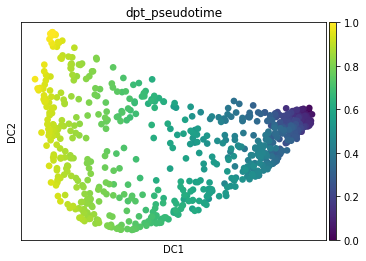

End time after X: 2024-12-19 15:03:31.404076
Duration for UMAP: 0:00:10.505296


In [12]:
# pseudotimeを考えます。

import datetime
import pandas as pd
import numpy as np
from scipy.stats import zscore
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()
print("Start time:", start_time)

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_NN_corrected_all.csv', index_col='atlasID')

# 欠損値を各列の平均値で埋める
data_pivot = X#.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアでデータを正規化し、ゼロ分散を持つ行に対してNaNを0に置換
data_normalized = data_pivot.apply(zscore, axis=1).fillna(0)

# 各行がリストになっているので、それを展開して2次元のnumpy配列に変換
X_matrix = np.vstack(data_normalized)

# 無効な値（NaNや無限大）が含まれていないか確認し、置換
X_matrix_cleaned = np.nan_to_num(X_matrix, nan=0, posinf=0, neginf=0)

# AnnDataオブジェクトに変換
adata = anndata.AnnData(X_matrix_cleaned)

# 最近傍グラフの計算
sc.pp.neighbors(adata, use_rep='X', n_neighbors=15)

# ルートセルの設定
adata.uns['iroot'] = 240 #240#597 #532 #634

# 拡散マップの計算
sc.tl.diffmap(adata)

# 疑似時間の計算
sc.tl.dpt(adata)

# 疑似時間の表示
print(adata.obs['dpt_pseudotime'])

# 拡散マップを表示
sc.pl.diffmap(adata, color=['dpt_pseudotime'], cmap='viridis',show=False)

# plt.savefigで直接PDFに保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Microglia_NN_pseudotime_diffusion_map.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot (not necessary if it's already saved, but optional)
plt.show()


# 実行時間の計測
end_time1 = datetime.datetime.now()
print("End time after X:", end_time1)
print("Duration for UMAP:", end_time1 - start_time)


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.


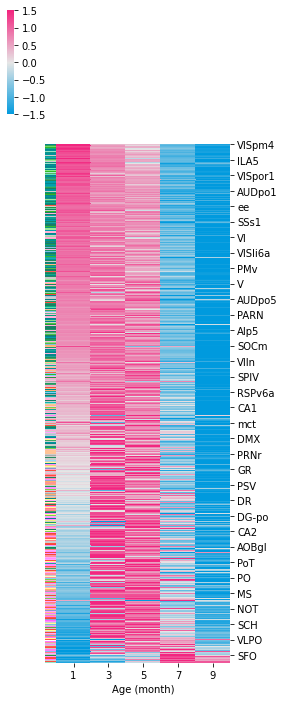

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df,  cmap = cmap, row_colors=colorlist_671, vmin=-1.5, vmax=1.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

# Adjust layout to avoid overlap and save as a single figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Regional_Microglia_NN_heatmap_after_Pseudotime_reordered.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


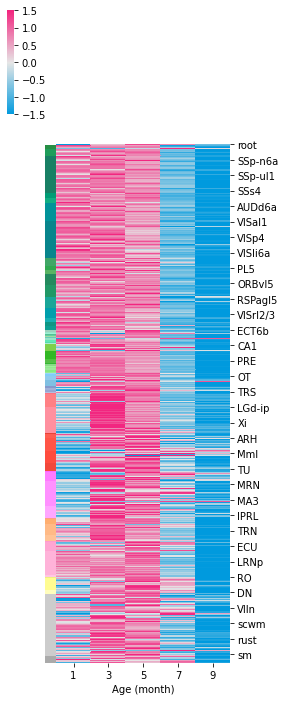

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df, cmap=cmap, row_colors=colorlist_671, vmin=-1.5, vmax=1.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Regional_Microglia_NN_heatmap_before_Pseudotime_reordered.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

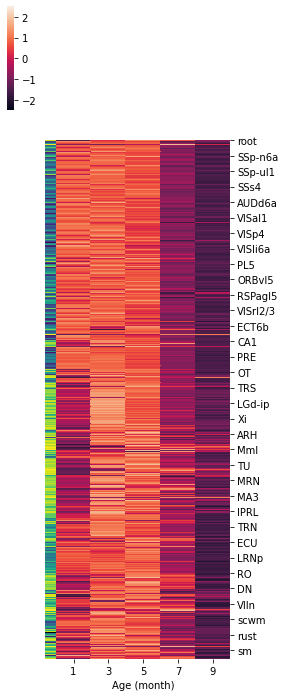

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# sorted_data_df.indexに対応するdpt_pseudotimeを取得するためにマッピング
sorted_pseudotime_full = pd.DataFrame(merged_data[['atlasID', 'dpt_pseudotime']])

# sorted_data_df のインデックス（atlasID）に基づいて pseudotime を並べ替える
sorted_pseudotime_full = sorted_pseudotime_full.set_index('atlasID').reindex(sorted_data_df.index)

# Viridisカラーマップを使って pseudotime_colors を設定
viridis = plt.cm.get_cmap('viridis', 256)
norm = plt.Normalize(vmin=0, vmax=1)
pseudotime_colors = viridis(norm(sorted_pseudotime_full['dpt_pseudotime']))

# プロットをクリアするために挿入
plt.clf()

# clustermapプロット
g = sns.clustermap(sorted_data_df, row_colors=pseudotime_colors, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)

# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

if 1==0:
    # カラーバーの小さな軸を作成
    cbar_ax = g.fig.add_axes([1, 0.4, 0.025, 0.125])  # 左からの位置, 下からの位置, 横幅, 縦幅

    # カラーバーを設定
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=viridis), cax=cbar_ax, label='Pseudotime')

    # 枠線を消す
    cbar.outline.set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Regional_Microglia_NN_heatmap_before_Pseudotime_reordered_with_pseudotime_annotation.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

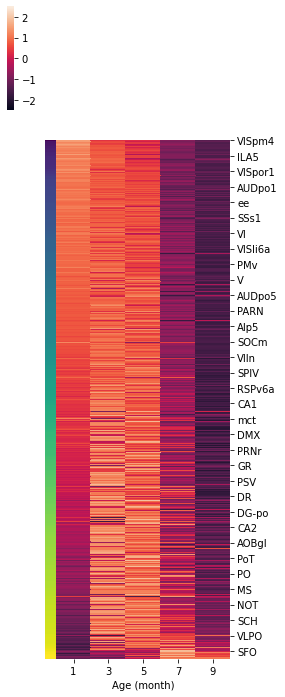

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# Viridisカラーマップを使ってpseudotimeの色を設定
viridis = plt.cm.get_cmap('viridis', 256)
norm = plt.Normalize(vmin=0, vmax=1)
pseudotime_colors = viridis(norm(sorted_pseudotime_full))

# プロットをクリアするために挿入
plt.clf()

# clustermapプロット
g = sns.clustermap(sorted_data_df, row_colors=pseudotime_colors, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)

# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

if 1==0:
    # カラーバーの小さな軸を作成
    cbar_ax = g.fig.add_axes([1, 0.4, 0.025, 0.125])  # 左からの位置, 下からの位置, 横幅, 縦幅

    # カラーバーを設定
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=viridis), cax=cbar_ax, label='Pseudotime')

    # 枠線を消す
    cbar.outline.set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Regional_Microglia_NN_heatmap_after_Pseudotime_reordered_with_pseudotime_annotation.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


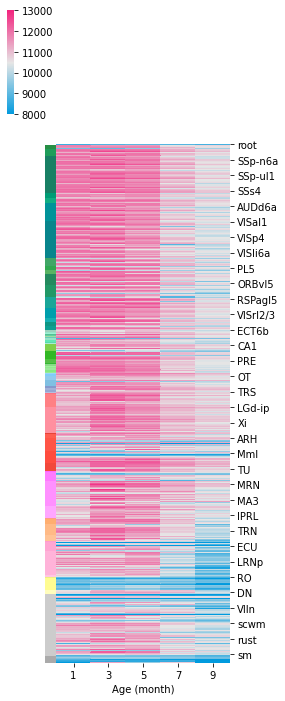

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot#.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized, index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df, cmap=cmap, row_colors=colorlist_671, vmin=8000, vmax=13000, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_before_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


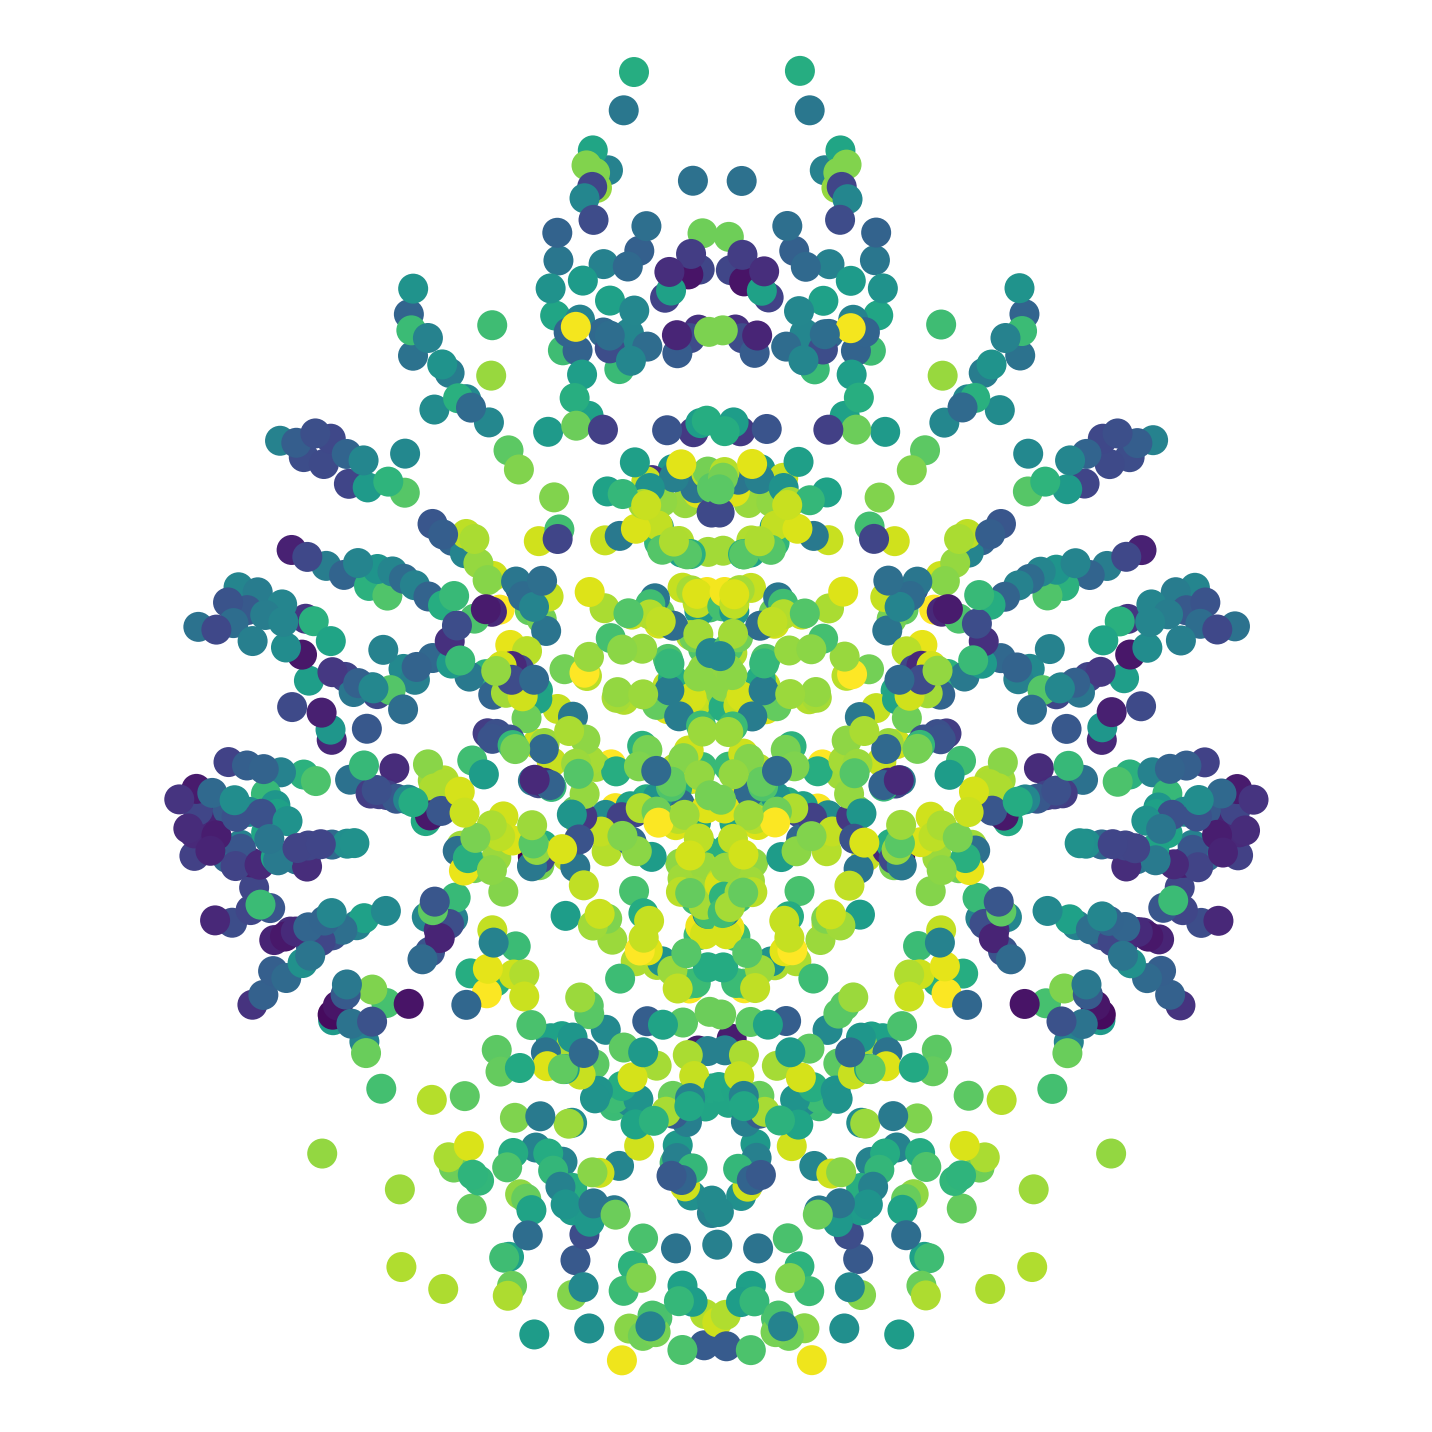

In [18]:
# atlasID が適切に設定されていることを確認する
# adata.obs に atlasID が含まれていることを前提にします
if 'atlasID' not in adata.obs.columns:
    adata.obs['atlasID'] = data_normalized.index

# pseudotime_df を adata.obs から作成し、インデックスを atlasID にする
pseudotime_df = pd.DataFrame(adata.obs[['atlasID', 'dpt_pseudotime']])

# pseudotime_df のインデックスを data_normalized のインデックス（atlasID）に基づいて設定
pseudotime_df = pseudotime_df.set_index('atlasID')

# data_normalized のインデックスに対応して pseudotime の値をマッピング
all_centroids['pseudotime'] = all_centroids['atlasID'].map(pseudotime_df['dpt_pseudotime'])

# pseudotime が NaN の場合は 0 で補完（必要に応じて）
all_centroids['pseudotime'] = all_centroids['pseudotime'].fillna(0)

# viridis_rカラーマップを使用して色情報を生成
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=all_centroids['pseudotime'].min(), vmax=all_centroids['pseudotime'].max())
all_centroids['colors'] = all_centroids['pseudotime'].apply(lambda x: cmap(norm(x)))

# 散布図をプロット
plt.figure(figsize=(20, 20))
sc = plt.scatter(all_centroids['X(um)'], all_centroids['Y(um)'], s=900, c=all_centroids['colors'], edgecolor='none')
#plt.title('Centroids of Left and Right Brain with Pseudotime Coloration')
#plt.xlabel('X (um)')
#plt.ylabel('Y (um)')
plt.axis('equal')  # 軸を等方的にする
plt.gca().invert_yaxis()  # Y軸を反転
plt.gca().spines['top'].set_visible(False)  # 上の軸線を非表示
plt.gca().spines['right'].set_visible(False)  # 右の軸線を非表示
plt.gca().spines['left'].set_visible(False)  # 左の軸線を非表示
plt.gca().spines['bottom'].set_visible(False)  # 下の軸線を非表示
#plt.colorbar(sc, label='Pseudotime from Abeta PCA')  # カラーバーを追加
plt.xticks([])  # X軸の目盛りを非表示
plt.yticks([])  # Y軸の目盛りを非表示

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Whole_brain_plot_of_Regional_Microglia_NN_psedotime.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [19]:
merged_data_NN = merged_data.copy()

In [ ]:
# pseudotimeの相関を見る。

Start time: 2024-12-19 15:03:45.764276


/home/mitani/my_env/lib64/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


0      0.815325
1      0.054719
2      0.381347
3      0.929433
4      0.194832
         ...   
666    0.937328
667    0.655858
668    0.944422
669    0.752759
670    0.985973
Name: dpt_pseudotime, Length: 671, dtype: float32


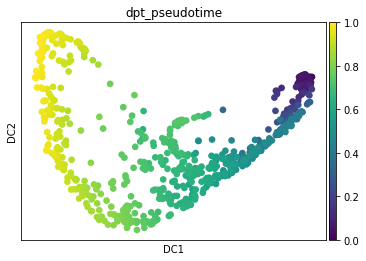

End time after X: 2024-12-19 15:03:46.359255
Duration for UMAP: 0:00:00.594979


In [20]:
# Aβのpseudotimeを読み出します。

import datetime
import pandas as pd
import numpy as np
from scipy.stats import zscore
import anndata
import scanpy as sc

start_time = datetime.datetime.now()
print("Start time:", start_time)

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_all.csv', index_col='atlasID')

# 欠損値を各列の平均値で埋める
data_pivot = X#.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))


# Zスコアでデータを正規化し、ゼロ分散を持つ行に対してNaNを0に置換
data_normalized = data_pivot.apply(zscore, axis=1).fillna(0)

# 各行がリストになっているので、それを展開して2次元のnumpy配列に変換
X_matrix = np.vstack(data_normalized)

# 無効な値（NaNや無限大）が含まれていないか確認し、置換
X_matrix_cleaned = np.nan_to_num(X_matrix, nan=0, posinf=0, neginf=0)



# AnnDataオブジェクトに変換
adata = anndata.AnnData(X_matrix_cleaned)

# 最近傍グラフの計算
sc.pp.neighbors(adata, use_rep='X', n_neighbors=15)

# ルートセルの設定
adata.uns['iroot'] = 634

# 拡散マップの計算
sc.tl.diffmap(adata)

# 疑似時間の計算
sc.tl.dpt(adata)

# 疑似時間の表示
print(adata.obs['dpt_pseudotime'])

# 拡散マップを表示
sc.pl.diffmap(adata, color=['dpt_pseudotime'], cmap='viridis',show=False)

# plt.savefigで直接PDFに保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Abeta_pseudotime_diffusion_map.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot (not necessary if it's already saved, but optional)
plt.show()


# 実行時間の計測
end_time1 = datetime.datetime.now()
print("End time after X:", end_time1)
print("Duration for UMAP:", end_time1 - start_time)


/home/mitani/my_env/lib64/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


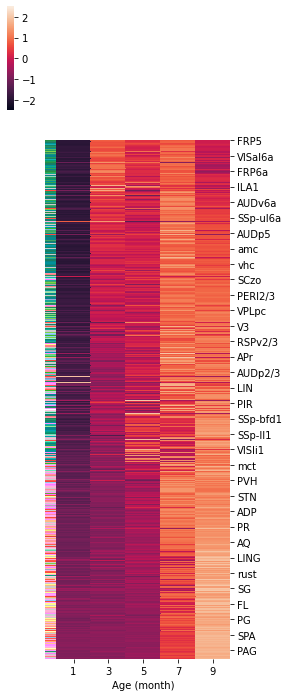

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)
# リスト状のデータを各列に展開
#data_normalized_df = pd.DataFrame(data_normalized.values, index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
def create_custom_cmap():
    # Colors: cyan, black, yellow
    colors = ["#00ffff", "#000000", "#ffff00"]
    cmap_name = "custom_cmap"
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df,  row_colors=colorlist_671, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

# Adjust layout to avoid overlap and save as a single figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_after_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [22]:
# Merge the data on atlasID
merged_data_Abeta = merged_data.copy()
merged = pd.merge(merged_data_Abeta, merged_data_NN, on='atlasID', suffixes=('_Abeta', '_NN'))



findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.


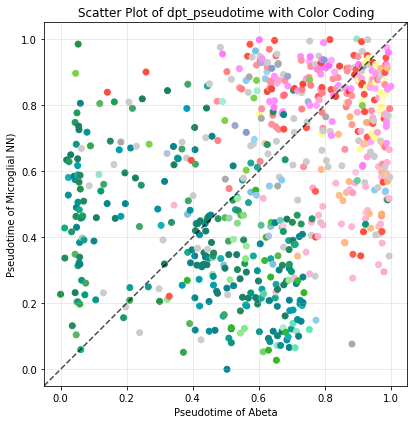

(0.36525503044214347, 1.4198404025499488e-22)

In [23]:
from scipy.stats import spearmanr
# Rename 'id' to 'atlasID' in data_GO for consistent merging
data_GO2 = data_GO.rename(columns={'id': 'atlasID'})

# Merge data_GO with the merged DataFrame for color information
merged = merged.merge(data_GO2, on='atlasID', how='left')

# Add a color column using RGB values
merged['color'] = merged.apply(lambda x: (x['R'] / 255, x['G'] / 255, x['B'] / 255), axis=1)

# Scatter plot with specified format
plt.figure(figsize=(6, 6))
plt.scatter(merged['dpt_pseudotime_Abeta'], merged['dpt_pseudotime_NN'], c=merged['color'], alpha=1.0)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Add y=x line
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', linestyle='--', label='y=x', alpha=0.7)

# Add axis labels and title
plt.xlabel('Pseudotime of Abeta')
plt.ylabel('Pseudotime of Microglial NN)')
plt.title('Scatter Plot of dpt_pseudotime with Color Coding')

# Adjust grid and layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save as PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/dpt_pseudotime_scatter_plot_Abeta_pseudotime_to_Microglia_NDD_pseudotime.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

# Recalculate Spearman correlation with p-value
correlation, p_value = spearmanr(merged['dpt_pseudotime_Abeta'], merged['dpt_pseudotime_NN'])

correlation, p_value

Start time: 2024-12-19 15:04:12.487036


/home/mitani/my_env/lib64/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


0       0.675812
1       0.230323
2       0.594358
3       0.883593
4       0.272414
          ...   
1337    0.785331
1338    0.877769
1339    0.798168
1340    0.940295
1341    0.680182
Name: dpt_pseudotime, Length: 1342, dtype: float32


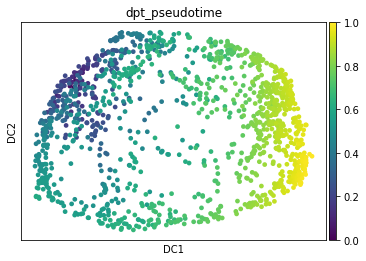

T-test p-value for pseudotime comparison: 2.082204357805239e-22
WT mean pseudotime: 0.5973152660843868
APP mean pseudotime: 0.6838850612722992


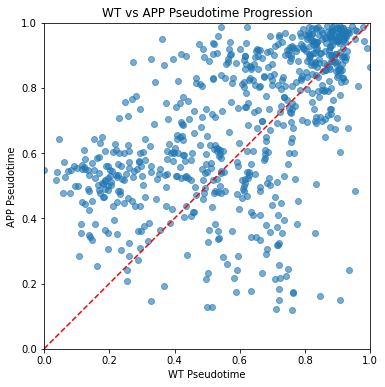

End time: 2024-12-19 15:04:13.760382
Total duration: 0:00:01.273346


In [24]:
import datetime
import pandas as pd
import numpy as np
from scipy.stats import zscore
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

start_time = datetime.datetime.now()
print("Start time:", start_time)

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_Whole_brain_normalized_Microglia_ratio_all.csv', index_col='atlasID')
X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_Whole_brain_normalized_Microglia_ratio_all.csv', index_col='atlasID')

# 列名を修正して、WTとAPPの違いをなくし、時間ベースで統一する
X.columns = ['1m', '3m', '5m', '7m', '9m']
X2.columns = ['1m', '3m', '5m', '7m', '9m']

# WTとAPPのデータを結合（行方向に）
combined_data = pd.concat([X, X2], axis=0, keys=['WT', 'APP'])

# Zスコアでデータを正規化し、ゼロ分散を持つ行に対してNaNを0に置換
data_normalized = combined_data.apply(zscore, axis=1).fillna(0)

# 各行を2次元のnumpy配列に変換
X_matrix = np.vstack(data_normalized.tolist())

# 無効な値（NaNや無限大）が含まれていないか確認し、置換
#X_matrix_cleaned = np.nan_to_num(X_matrix, nan=0, posinf=0, neginf=0)
# X_matrix_cleanedに数値データのみを抽出
#X_matrix_numeric = data_normalized.values  # 数値データを取得

# NaNを0に置換
#X_matrix_cleaned = np.nan_to_num(X_matrix_numeric)

# 正の無限大と負の無限大を0に置換
#X_matrix_cleaned[X_matrix_cleaned == np.inf] = 0
#X_matrix_cleaned[X_matrix_cleaned == -np.inf] = 0
# AnnDataオブジェクトに変換
#adata = anndata.AnnData(X_matrix_cleaned)


# NaNや無限大を0に置換
X_matrix_cleaned = np.nan_to_num(X_matrix, nan=0.0, posinf=0.0, neginf=0.0)

# AnnDataオブジェクトに変換
adata = anndata.AnnData(X_matrix_cleaned)

# 最近傍グラフの計算
sc.pp.neighbors(adata, use_rep='X', n_neighbors=15)

# ルートセルの設定（適切なセルインデックスを設定）
adata.uns['iroot'] = 240#597+671  # 適切なセルをルートとして設定

# 拡散マップの計算
sc.tl.diffmap(adata)

# 疑似時間の計算
sc.tl.dpt(adata)

# pseudotimeを取得
pseudotime = adata.obs['dpt_pseudotime'].values
# 疑似時間の表示
print(adata.obs['dpt_pseudotime'])

# 拡散マップを表示
sc.pl.diffmap(adata, color=['dpt_pseudotime'], cmap='viridis',show=False)

# plt.savefigで直接PDFに保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.6/Microglia_pseudotime_diffusion_map.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot (not necessary if it's already saved, but optional)
plt.show()
# pseudotimeをcombined_dataに追加
combined_data['pseudotime'] = pseudotime

# WTとAPPの行インデックスを取得
wt_indices = combined_data.index.get_level_values(0) == 'WT'
app_indices = combined_data.index.get_level_values(0) == 'APP'

# WTとAPPに分割してpseudotimeを割り当てる
combined_data['WT_pseudotime'] = np.nan
combined_data['APP_pseudotime'] = np.nan
combined_data.loc[wt_indices, 'WT_pseudotime'] = combined_data.loc[wt_indices, 'pseudotime']
combined_data.loc[app_indices, 'APP_pseudotime'] = combined_data.loc[app_indices, 'pseudotime']

# WTとAPPの領域ごとのpseudotimeを比較する
# NaNを除外して比較
wt_pseudotime_clean = combined_data['WT_pseudotime'].dropna()
app_pseudotime_clean = combined_data['APP_pseudotime'].dropna()

# Wilcoxon signed-rank test to compare pseudotime progression
stat, p_val = ttest_rel(wt_pseudotime_clean, app_pseudotime_clean)
print(f'T-test p-value for pseudotime comparison: {p_val}')

# APPとWTのpseudotimeの平均値を計算
wt_mean = wt_pseudotime_clean.mean()
app_mean = app_pseudotime_clean.mean()
print(f'WT mean pseudotime: {wt_mean}')
print(f'APP mean pseudotime: {app_mean}')

# Scatter plot to visualize pseudotime progression
plt.figure(figsize=(8,6))
plt.scatter(wt_pseudotime_clean, app_pseudotime_clean, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')  # 0-1の範囲でプロット
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('WT Pseudotime')
plt.ylabel('APP Pseudotime')
plt.title('WT vs APP Pseudotime Progression')
plt.gca().set_aspect('equal', adjustable='box')  # 等方的にプロット
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Abeta_pseudotime_comparison_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 実行時間の計測
end_time = datetime.datetime.now()
print("End time:", end_time)
print("Total duration:", end_time - start_time)

/home/mitani/my_env/lib64/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


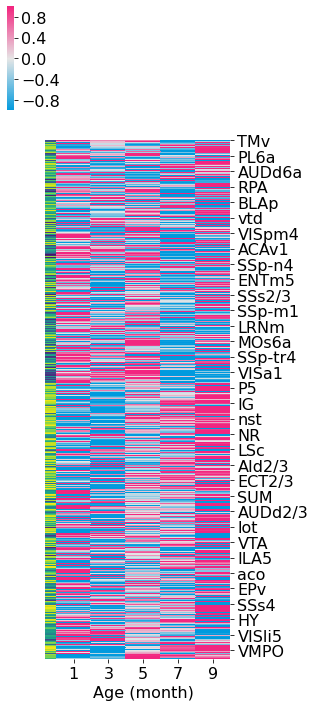

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.colors as mcolors
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 16

# Load data
X_wt = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_Whole_brain_normalized_Microglia_ratio_all.csv')
X_app = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_Whole_brain_normalized_Microglia_ratio_all.csv')

# Ensure the data is set with 'atlasID' as index
X_wt.set_index('atlasID', inplace=True)
X_app.set_index('atlasID', inplace=True)

# Align columns by renaming to be consistent across both datasets
X_wt.columns = ['1m', '3m', '5m', '7m', '9m']
X_app.columns = ['1m', '3m', '5m', '7m', '9m']

# Apply z-score normalization across rows (for each region)
X_wt_normalized = pd.DataFrame(zscore(X_wt, axis=1), index=X_wt.index, columns=X_wt.columns)
X_app_normalized = pd.DataFrame(zscore(X_app, axis=1), index=X_app.index, columns=X_app.columns)

# Combine the two datasets (WT and APP)
combined_normalized = pd.concat([X_wt_normalized, X_app_normalized], axis=0)

# Ensure the combined data is numeric
combined_normalized = combined_normalized.apply(pd.to_numeric, errors='coerce')

# Check for any NaN values and fill them with 0
combined_normalized = combined_normalized.fillna(0)

# Assuming pseudotime is calculated and exists in the dataset
pseudotime = adata.obs['dpt_pseudotime'].values  # Replace with your actual pseudotime data
combined_normalized['pseudotime'] = pseudotime

# ここで順序を変更せずに、pseudotime カラーマップを作成
viridis = plt.cm.get_cmap('viridis', 256)
norm = plt.Normalize(vmin=combined_normalized['pseudotime'].min(), vmax=combined_normalized['pseudotime'].max())
pseudotime_colors = viridis(norm(combined_normalized['pseudotime']))

# Custom colormap for heatmap values
def create_custom_cmap():
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", [
        (0.0, 154/255, 222/255), 
        (0.9, 0.9, 0.9), 
        (0.95, 0.15, 0.5)
    ])

# Plot using seaborn's clustermap with pseudotime annotation
g = sns.clustermap(
    combined_normalized.drop(columns=['pseudotime']),  # Exclude pseudotime from heatmap
    cmap=create_custom_cmap(),
    row_colors=pseudotime_colors,  # Apply pseudotime-based colors
    col_cluster=False,
    row_cluster=False,
    vmin=-1, vmax=1,
    figsize=(4, 12)
)

# Assuming you have acronyms and sorted_data_df, adjust y-axis labels
step = 40  # Adjust the step based on how many regions you want to show on the y-axis
acronyms = data_id.set_index('id').loc[combined_normalized.index, 'acronym']  # Get matching acronyms for y-axis labels
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))  # Set the ticks at the desired step
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)  # Set the labels at the same step
g.ax_heatmap.set_ylabel('')

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)

# Adjust layout to ensure proper display
plt.tight_layout()
# PDFとして保存（透過背景）
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.6/WT_and_APP_Microglia_heatmap_with_pseudotime_annotation_before_pseudotime_reorder.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the heatmap
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


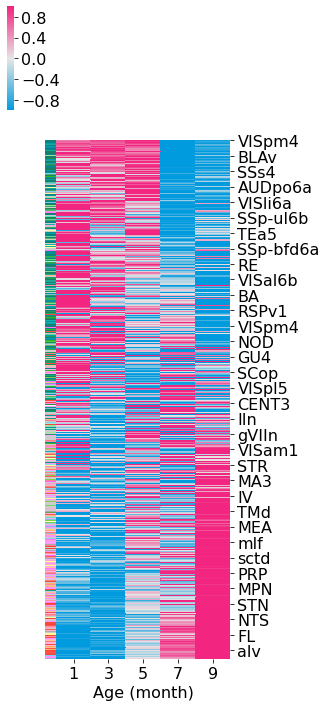

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.colors as mcolors
import anndata
import scanpy as sc

# Load data
X_wt = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_Whole_brain_normalized_Microglia_ratio_all.csv')
X_app = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_Whole_brain_normalized_Microglia_ratio_all.csv')

# Ensure the data is set with 'atlasID' as index
X_wt.set_index('atlasID', inplace=True)
X_app.set_index('atlasID', inplace=True)

# Align columns by renaming to be consistent across both datasets
X_wt.columns = ['1m', '3m', '5m', '7m', '9m']
X_app.columns = ['1m', '3m', '5m', '7m', '9m']

# Apply z-score normalization across rows (for each region) and expand lists into DataFrame properly
X_wt_normalized = pd.DataFrame(zscore(X_wt, axis=1), index=X_wt.index, columns=X_wt.columns)
X_app_normalized = pd.DataFrame(zscore(X_app, axis=1), index=X_app.index, columns=X_app.columns)

# Combine the two datasets (WT and APP) with an identifier for each type
X_wt_normalized['Type'] = 'WT'
X_app_normalized['Type'] = 'APP'
combined_normalized = pd.concat([X_wt_normalized, X_app_normalized], axis=0)

# Extract pseudotime and add it to the combined data (assuming pseudotime calculation is already done)
pseudotime = adata.obs['dpt_pseudotime'].values
combined_normalized['pseudotime'] = pseudotime

# Sort the data based on pseudotime in ascending order
combined_normalized_sorted = combined_normalized.sort_values('pseudotime', ascending=True)



# Create a dictionary mapping atlasID (from combined_normalized_sorted) to colors from data_GO
id_to_color = {
    row['id']: (row['R'] / 255, row['G'] / 255, row['B'] / 255) 
    for idx, row in data_GO.iterrows()
}

# Generate the row_colors based on the region ID in the sorted data
row_colors = combined_normalized_sorted.index.map(lambda idx: id_to_color.get(idx, (0.5, 0.5, 0.5)))  # Default to gray if not found

# Custom colormap
def create_custom_cmap():
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", [
        (0.0, 154/255, 222/255), 
        (0.9, 0.9, 0.9), 
        (0.95, 0.15, 0.5)
    ])

# Plot the heatmap
g = sns.clustermap(
    combined_normalized_sorted.drop(columns=['pseudotime', 'Type']),  # Drop pseudotime and type from heatmap
    cmap=create_custom_cmap(),
    row_colors=row_colors,  # Apply region-based color annotation
    col_cluster=False,
    row_cluster=False,
    vmin=-1, vmax=1,
    figsize=(4, 12)
)

# Assuming you have acronyms and sorted_data_df, adjust y-axis labels
step = 40  # Adjust the step based on how many regions you want to show on the y-axis
acronyms = data_id.set_index('id').loc[combined_normalized_sorted.index, 'acronym']  # Match acronyms for y-axis labels
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))  # Set ticks at the desired step
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)  # Label y-axis at the same step
g.ax_heatmap.set_ylabel('')
# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.6/WT_and_APP_Microglia_heatmap_with_allen_annotation_after_pseudotime_reorder.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [196]:
combined_normalized

,1m,3m,5m,7m,9m,Type,pseudotime
atlasID,,,,,,,
1,0.224022,0.127449,-0.610952,-1.374693,1.634175,WT,0.675812
2,1.303586,0.483974,0.558194,-1.130613,-1.215141,WT,0.230323
6,1.591632,-0.908199,0.174276,-1.217422,0.359713,WT,0.594358
7,-1.263622,-0.569667,0.298392,-0.184325,1.719222,WT,0.883593
9,0.267121,0.216695,1.430213,-1.665685,-0.248344,WT,0.272414
...,...,...,...,...,...,...,...
60850,-1.639756,-0.641601,1.063240,0.725599,0.492518,APP,0.785331
60854,-1.282655,-1.064800,0.864411,0.309038,1.174005,APP,0.877769
60858,-1.728216,-0.497958,0.999540,0.529912,0.696722,APP,0.798168


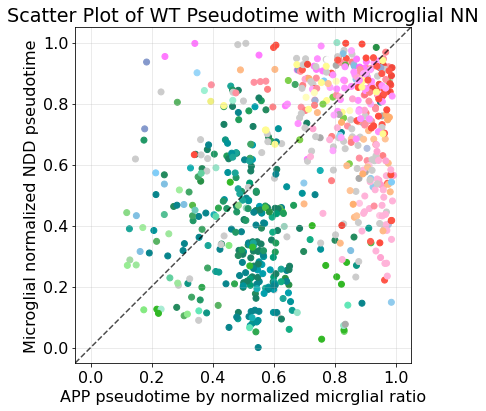

(0.39209299249676643, 4.7786469809970185e-26)

In [30]:
from scipy.stats import spearmanr
# Rename 'id' to 'atlasID' in data_GO for consistent merging
data_GO2 = data_GO.rename(columns={'id': 'atlasID'})

# Merge data_GO with the merged DataFrame for color information
merged = merged.merge(data_GO2, on='atlasID', how='left')

# Add a color column using RGB values
merged['color'] = merged.apply(lambda x: (x['R'] / 255, x['G'] / 255, x['B'] / 255), axis=1)

# Filter combined_normalized for Type 'WT' and extract pseudotime
app_pseudotime = combined_normalized.loc[combined_normalized['Type'] == 'APP', 'pseudotime']

# Ensure indices align between wt_pseudotime and merged using atlasID
app_pseudotime = app_pseudotime[merged['atlasID']]  # Reorder to match merged atlasID order

# Scatter plot with specified format
plt.figure(figsize=(6, 6))
plt.scatter(app_pseudotime, merged['dpt_pseudotime_NN'], c=merged['color'], alpha=1.0)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Add y=x line
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', linestyle='--', label='y=x', alpha=0.7)

# Add axis labels and title
plt.xlabel('APP pseudotime by normalized micrglial ratio')
plt.ylabel('Microglial normalized NDD pseudotime')
plt.title('Scatter Plot of WT Pseudotime with Microglial NN')

# Adjust grid and layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save as PDF with transparent background
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/dpt_pseudotime_scatter_plot_APP_normalized_microglia_ratio_to_Microglia_NDD_pseudotime.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

# Recalculate Spearman correlation with p-value
correlation, p_value = spearmanr(app_pseudotime, merged['dpt_pseudotime_NN'])

correlation, p_value

[(24.63157894736842, (24.53157894736842, 24.731578947368423), 1.0214965569851771e-52, 'Aβ Positive'), (0.0405982905982906, (-0.059401709401709406, 0.1405982905982906), 1.0214965569851773e-52, 'Aβ Negative')]
[1.021496557e-52 1.021496557e-52]


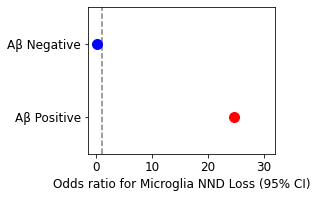

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as multitest
import matplotlib

# Font settings
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams.update({'font.size': 12})

# Load data
X1 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_increase.csv', index_col='atlasID')
X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_NN_corrected_decrease.csv', index_col='atlasID')

# Boolean masks
abeta_increase_regions = X1.index
microglia_loss_regions = X2.index

# DataFrameで全領域を定義 (0-671)
all_regions = pd.Index(range(671))
df_overlap = pd.DataFrame(index=all_regions)
df_overlap['Abeta_increase'] = df_overlap.index.isin(abeta_increase_regions)
df_overlap['Microglia_NND_loss'] = df_overlap.index.isin(microglia_loss_regions)

# 条件の設定
conditions = {
    "Aβ Positive": df_overlap['Abeta_increase'],
    "Aβ Negative": ~df_overlap['Abeta_increase']
}

# 結果を格納するリスト
results = []

# 各条件についてオッズ比を計算
for condition_name, condition_filter in conditions.items():
    microglia_loss_in_condition = (df_overlap['Microglia_NND_loss'] & condition_filter).sum()
    no_microglia_loss_in_condition = condition_filter.sum() - microglia_loss_in_condition
    microglia_loss_outside_condition = (df_overlap['Microglia_NND_loss'] & ~condition_filter).sum()
    no_microglia_loss_outside_condition = (~condition_filter).sum() - microglia_loss_outside_condition

    # 2x2 テーブル作成
    contingency_table = [
        [microglia_loss_in_condition, no_microglia_loss_in_condition],
        [microglia_loss_outside_condition, no_microglia_loss_outside_condition]
    ]

    # Fisherの正確確率検定
    odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')
    results.append((odds_ratio, (odds_ratio - 0.1, odds_ratio + 0.1), p_value, condition_name))

print(results)
# P値をFDR補正
p_values = [r[2] for r in results]
reject, pvals_corrected, _, _ = multitest.multipletests(p_values, method='fdr_bh')
print(pvals_corrected)

# Visualization
fig, ax = plt.subplots(figsize=(4, len(results) * 1.2))
y_labels = [result[3] for result in results]

for i, (odds_ratio, conf_interval, _, condition) in enumerate(results):
    fdr_corrected_p_value = pvals_corrected[i]
    color = 'red' if odds_ratio > 1 else 'blue'
    color = 'gray' if fdr_corrected_p_value >= 0.05 else color
    ax.errorbar(odds_ratio, i, xerr=[[odds_ratio - conf_interval[0]], [conf_interval[1] - odds_ratio]],
                fmt='o', color=color, markersize=10)

ax.axvline(1, color='grey', linestyle='--')  # ベースライン
ax.set_xlim(-1.5, 32)
ax.set_ylim(-0.5, len(results) - 0.5)
ax.set_yticks(range(len(results)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('Odds ratio for Microglia NND Loss (95% CI)')
#ax.set_title('Aβ Positive vs Negative: Microglia NND Loss Risk')

# レイアウト調整
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)

# 保存
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Odds_ratio_for_Micrglia_NDD_loss_by_Abeta_BG.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


[(67.21614583333333, (67.11614583333333, 67.31614583333332), 1.6615265427686306e-29, 'Microglial NDD decrease Positive'), (0.014877377862151795, (-0.08512262213784821, 0.1148773778621518), 1.661526542768631e-29, 'Microglial NDD decrease Negative')]
[1.6615265428e-29 1.6615265428e-29]


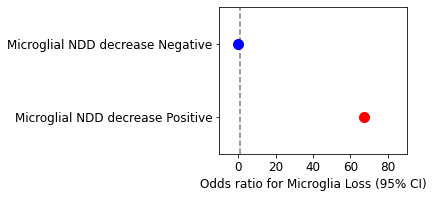

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as multitest
import matplotlib

# Font settings
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams.update({'font.size': 12})

# Load data
X1 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_NN_corrected_decrease.csv', index_col='atlasID')
X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_decrease.csv', index_col='atlasID')

# Boolean masks
abeta_increase_regions = X1.index
microglia_loss_regions = X2.index

# DataFrameで全領域を定義 (0-671)
all_regions = pd.Index(range(671))
df_overlap = pd.DataFrame(index=all_regions)
df_overlap['Abeta_increase'] = df_overlap.index.isin(abeta_increase_regions)
df_overlap['Microglia_NND_loss'] = df_overlap.index.isin(microglia_loss_regions)

# 条件の設定
conditions = {
    "Microglial NDD decrease Positive": df_overlap['Abeta_increase'],
    "Microglial NDD decrease Negative": ~df_overlap['Abeta_increase']
}

# 結果を格納するリスト
results = []

# 各条件についてオッズ比を計算
for condition_name, condition_filter in conditions.items():
    microglia_loss_in_condition = (df_overlap['Microglia_NND_loss'] & condition_filter).sum()
    no_microglia_loss_in_condition = condition_filter.sum() - microglia_loss_in_condition
    microglia_loss_outside_condition = (df_overlap['Microglia_NND_loss'] & ~condition_filter).sum()
    no_microglia_loss_outside_condition = (~condition_filter).sum() - microglia_loss_outside_condition

    # 2x2 テーブル作成
    contingency_table = [
        [microglia_loss_in_condition, no_microglia_loss_in_condition],
        [microglia_loss_outside_condition, no_microglia_loss_outside_condition]
    ]

    # Fisherの正確確率検定
    odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')
    results.append((odds_ratio, (odds_ratio - 0.1, odds_ratio + 0.1), p_value, condition_name))

print(results)
# P値をFDR補正
p_values = [r[2] for r in results]
reject, pvals_corrected, _, _ = multitest.multipletests(p_values, method='fdr_bh')
print(pvals_corrected)

# Visualization
fig, ax = plt.subplots(figsize=(4, len(results) * 1.2))
y_labels = [result[3] for result in results]

for i, (odds_ratio, conf_interval, _, condition) in enumerate(results):
    fdr_corrected_p_value = pvals_corrected[i]
    color = 'red' if odds_ratio > 1 else 'blue'
    color = 'gray' if fdr_corrected_p_value >= 0.05 else color
    ax.errorbar(odds_ratio, i, xerr=[[odds_ratio - conf_interval[0]], [conf_interval[1] - odds_ratio]],
                fmt='o', color=color, markersize=10)

ax.axvline(1, color='grey', linestyle='--')  # ベースライン
ax.set_xlim(-10, 90)
ax.set_ylim(-0.5, len(results) - 0.5)
ax.set_yticks(range(len(results)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('Odds ratio for Microglia Loss (95% CI)')
#ax.set_title('Aβ Positive vs Negative: Microglia NND Loss Risk')

# レイアウト調整
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)

# 保存
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Odds_ratio_for_Micrglia_loss_by_Micrglia_NDD_loss_BG.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


[(2.62137296532201, (2.52137296532201, 2.72137296532201), 0.0015398139350432634, 'Microglial NDD decrease Positive'), (0.38147948164146867, (0.28147948164146863, 0.4814794816414687), 0.0015398139350432634, 'Microglial NDD decrease Negative')]
[0.0015398139 0.0015398139]


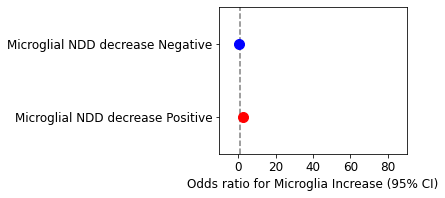

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as multitest
import matplotlib

# Font settings
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams.update({'font.size': 12})

# Load data
X1 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_NN_corrected_decrease.csv', index_col='atlasID')
X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_increase.csv', index_col='atlasID')

# Boolean masks
abeta_increase_regions = X1.index
microglia_loss_regions = X2.index

# DataFrameで全領域を定義 (0-671)
all_regions = pd.Index(range(671))
df_overlap = pd.DataFrame(index=all_regions)
df_overlap['Abeta_increase'] = df_overlap.index.isin(abeta_increase_regions)
df_overlap['Microglia_NND_loss'] = df_overlap.index.isin(microglia_loss_regions)

# 条件の設定
conditions = {
    "Microglial NDD decrease Positive": df_overlap['Abeta_increase'],
    "Microglial NDD decrease Negative": ~df_overlap['Abeta_increase']
}

# 結果を格納するリスト
results = []

# 各条件についてオッズ比を計算
for condition_name, condition_filter in conditions.items():
    microglia_loss_in_condition = (df_overlap['Microglia_NND_loss'] & condition_filter).sum()
    no_microglia_loss_in_condition = condition_filter.sum() - microglia_loss_in_condition
    microglia_loss_outside_condition = (df_overlap['Microglia_NND_loss'] & ~condition_filter).sum()
    no_microglia_loss_outside_condition = (~condition_filter).sum() - microglia_loss_outside_condition

    # 2x2 テーブル作成
    contingency_table = [
        [microglia_loss_in_condition, no_microglia_loss_in_condition],
        [microglia_loss_outside_condition, no_microglia_loss_outside_condition]
    ]

    # Fisherの正確確率検定
    odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')
    results.append((odds_ratio, (odds_ratio - 0.1, odds_ratio + 0.1), p_value, condition_name))

print(results)
# P値をFDR補正
p_values = [r[2] for r in results]
reject, pvals_corrected, _, _ = multitest.multipletests(p_values, method='fdr_bh')
print(pvals_corrected)

# Visualization
fig, ax = plt.subplots(figsize=(4, len(results) * 1.2))
y_labels = [result[3] for result in results]

for i, (odds_ratio, conf_interval, _, condition) in enumerate(results):
    fdr_corrected_p_value = pvals_corrected[i]
    color = 'red' if odds_ratio > 1 else 'blue'
    color = 'gray' if fdr_corrected_p_value >= 0.05 else color
    ax.errorbar(odds_ratio, i, xerr=[[odds_ratio - conf_interval[0]], [conf_interval[1] - odds_ratio]],
                fmt='o', color=color, markersize=10)

ax.axvline(1, color='grey', linestyle='--')  # ベースライン
ax.set_xlim(-10, 90)
ax.set_ylim(-0.5, len(results) - 0.5)
ax.set_yticks(range(len(results)))
ax.set_yticklabels(y_labels)
ax.set_xlabel('Odds ratio for Microglia Increase (95% CI)')
#ax.set_title('Aβ Positive vs Negative: Microglia NND Loss Risk')

# レイアウト調整
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)

# 保存
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Extended Data Fig.5/Odds_ratio_for_Micrglia_increase_by_Micrglia_NDD_loss_BG.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [38]:
pvals_corrected

array([0.0015398139, 0.0015398139])

In [47]:
dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])

sample = "#4_APPmodel_Ctr1m_1_2022_1104_1550"
param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
#try:
with open(param_path) as f:
    param = json.load(f)
fw_dir_nu = param["dst_basedir"]
cellome_file = fw_dir_nu + "/Neuronal_cellome_NearestNeighbor_Iba1_1.bin"
if os.path.exists(cellome_file):  # 確認するファイルパスに注意
    print(sample)
    df = np.fromfile(cellome_file, dtype=dt_voxel)

#4_APPmodel_Ctr1m_1_2022_1104_1550


In [48]:
df

array([(5006.874 , 13166.048  , 13166.048  , 18.388208, 944),
       (5024.7974, 13165.909  , 13165.909  , 18.388208, 944),
       (4878.3438, 13169.775  , 13169.775  , 42.770267, 944), ...,
       (6701.6143,   138.27861,   138.27861, 27.259302, 698),
       (6652.1675,   142.57732,   142.57732, 16.183542, 698),
       (6633.48  ,   105.88691,   105.88691, 40.841297, 698)],
      dtype=[('X(um)', '<f4'), ('Y(um)', '<f4'), ('Z(um)', '<f4'), ('NeuN_neighbor_r_100um', '<f4'), ('atlasID', '<u2')])

In [50]:
df['NeuN_neighbor_r_100um'].mean()

31.011292

In [7]:
from rpy2.robjects import r
print(r['.libPaths']())


[1] "/home/mitani/R/x86_64-redhat-linux-gnu-library/3.6"
[2] "/usr/lib64/R/library"                              
[3] "/usr/share/R/library"                              



In [8]:
from rpy2.robjects.packages import importr

# Rのspatstatパッケージを読み込み
spatstat = importr('spatstat')
print("spatstat has been loaded successfully.")


spatstat has been loaded successfully.


In [26]:
import rpy2.robjects as robjects
from rpy2.robjects.vectors import FloatVector

# Rのspatstatパッケージを読み込み
spatstat = robjects.r('library(spatstat)')

def hopkins_skellam_test(x, y, nsim=999, alternative="two.sided", method="MonteCarlo"):
    """
    Perform Hopkins-Skellam test for spatial randomness using spatstat in R.
    
    Parameters:
        x (list or ndarray): X coordinates of the point pattern.
        y (list or ndarray): Y coordinates of the point pattern.
        nsim (int): Number of Monte Carlo simulations.
        alternative (str): Type of alternative hypothesis ('two.sided', 'greater', 'less').
        method (str): Test method ('MonteCarlo' or 'asymptotic').
    
    Returns:
        result (str): R's htest result as a string.
    """
    # Rのデータを作成
    x_r = FloatVector(x)
    y_r = FloatVector(y)
    
    # R側のpppオブジェクト作成
    robjects.r('''
        create_ppp <- function(x, y) {
            W <- owin(xrange = range(x), yrange = range(y))
            ppp(x, y, window = W)
        }
    ''')
    create_ppp = robjects.globalenv['create_ppp']
    ppp_data = create_ppp(x_r, y_r)

    # Rのhopskel.test関数を直接呼び出す
    hopskel_test = robjects.r['hopskel.test']#['hopskel.test']
    result = hopskel_test(ppp_data, alternative=alternative, method=method, nsim=nsim)
    
    return result

# 使用例
if __name__ == "__main__":
    import numpy as np
    np.random.seed(42)
    x = np.random.uniform(0, 10, 10000)
    y = np.random.uniform(0, 10, 10000)

    # Hopkins-Skellam Testを実行
    result = hopkins_skellam_test(x, y, nsim=999, alternative="two.sided", method="asymptotic")
    print(result)



	Hopkins-Skellam test of CSR
	using F distribution

data:  list(list("rectangle", c(0.000116347553661411, 9.99717673286131
A = 0.99369, p-value = 0.6546
alternative hypothesis: two-sided




In [19]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def hopskel_test_3d(coords, nsim=999):
    """
    3D版 Hopkins-Skellam Test: 空間ランダム性を評価する。
    Parameters:
        coords (ndarray): 3D座標データ (N x 3)。
        nsim (int): Monte Carloシミュレーション回数。
    Returns:
        A_value (float): Hopkins-Skellam統計量A。
        H_value (float): Hopkins-Skellam統計量H。
        p_value (float): p値。
    """
    n_points = coords.shape[0]
    space_min = coords.min(axis=0)
    space_max = coords.max(axis=0)
    
    # Step 1: 観測データの最近傍距離 P_i を計算
    nbrs_obs = NearestNeighbors(n_neighbors=2).fit(coords)
    distances_obs, _ = nbrs_obs.kneighbors(coords)
    P = distances_obs[:, 1]  # 自身を除いた最近傍距離

    # Step 2: Monte Carlo法でランダム点群の最近傍距離 I_i を計算
    I_sums = []
    for _ in range(nsim):
        # ランダム点群生成
        random_coords = np.random.uniform(space_min, space_max, size=(n_points, 3))
        nbrs_sim = NearestNeighbors(n_neighbors=2).fit(random_coords)
        distances_sim, _ = nbrs_sim.kneighbors(random_coords)
        I = distances_sim[:, 1]  # 自身を除いた最近傍距離
        I_sums.append(np.sum(I ** 2))
    
    # Step 3: 観測統計量Aを計算
    A_value = np.sum(P ** 2) / np.mean(I_sums)
    H_value = A_value / (1 + A_value)  # Hopkins-Skellam Hの計算
    p_value = np.mean([a >= np.sum(P ** 2) for a in I_sums])  # p値計算

    return A_value, H_value, p_value

# 使用例
np.random.seed(42)
coords = np.random.uniform(0, 10, size=(1000, 3))  # サンプル3Dデータ
A_value, H_value, p_value = hopskel_test_3d(coords)

print(f"Hopkins-Skellam statistic (A): {A_value:.4f}")
print(f"Hopkins-Skellam statistic (H): {H_value:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: Data shows significant clustering or regularity.")
else:
    print("Fail to reject null hypothesis: Data is consistent with randomness.")


Hopkins-Skellam statistic (A): 1.0236
Hopkins-Skellam statistic (H): 0.5058
p-value: 0.1732
Fail to reject null hypothesis: Data is consistent with randomness.


In [ ]:
# 各サンプルのデータを読み込んで、各サンプルの各regionごとのHSIを計算します

In [1]:
conditions = {
  #  "WT_0.2m": ["#3_1w_B6JWT_atlas_1_2022_1103_2305","1w_B6JWT_atlas_2_2022_1219_1829", "1w_B6JWT_atlas_3_2022_1223_1719", "1w_B6JWT_atlas_4_2023_0105_1708"],
  # "WT_0.75m": ["3w_B6JWT_atlas_1_2022_0925_1526", "3w_B6JWT_atlas_2_2022_1004_928", "3w_B6JWT_atlas_3_2022_1017_2126", "3w_B6JWT_atlas_4_2022_1130_1051"],
    "APP_1m": ["#4_APPmodel_APP1m_1_2022_1102_1304", "#4_APPmodel_APP1m_2_2022_1106_1708","#4_APPmodel_APP1m_3_2022_1213_2151","#4_APPmodel_APP1m_4_2023_0417_2052", ],
    "APP_3m": [ "#5_APPmodel_APP3m_2_2023_0123_1645", "#5_APPmodel_APP3m_3_2023_0212_2217","#5_APPmodel_APP3m_4_2023_0214_2027","#4_APPmodel_APP3m_5_2023_0502_1423",],
   "APP_5m": ["#4_APPmodel_APP5m_1_2022_1024_1336", "#4_APPmodel_APP5m_2_2022_1027_1333","#4_APPmodel_APP5m_3_2022_1030_1257", "#4_APPmodel_APP5m_4_2023_0509_1021"],
    "APP_7m": ["#5_APPmodel_APP7m_2_2023_0315_1540","#5_APPmodel_APP7m_3_2023_0310_1401","#5_APPmodel_APP7m_4_2023_0317_1630", "#5_APPmodel_APP7m_5_2023_0520_1723"],
    "APP_9m": ["#5_APPmodel_APP9m_1_2023_0117_1352","#5_APPmodel_APP9m_2_2023_0327_1425", "#5_APPmodel_APP9m_3_2023_0329_1611", "#5_APPmodel_APP9m_4_2023_0403_1443" ],
      
    "WT_1m": ["#4_APPmodel_Ctr1m_1_2022_1104_1550","#4_APPmodel_Ctr1m_2_2022_1108_959","#4_APPmodel_Ctr1m_3_2022_1209_1751"],
   # "WT_2m": ["8w_B6JWT_atlas_1_2022_0924_1847","8w_B6JWT_atlas_2_2022_0926_1326", "8w_B6JWT_atlas_3_2022_1005_1110", "8w_B6JWT_atlas_4_2022_1010_2030","8w_B6JWT_atlas_5_2023_0423_1604",],
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605", "#4_APPmodel_Ctr3m_4_2023_0427_1444",],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
    "WT_7m": [ "#5_APPmodel_Ctr7m_1_2023_0206_1534","#5_APPmodel_Ctr7m_2_2023_0313_1111","#5_APPmodel_Ctr7m_3_2023_0331_2139","#4_APPmodel_Ctr7m_4_2023_0516_1559","#5_APPmodel_Ctr7m_5_2023_0522_2218"],
    "WT_9m": [ "#5_APPmodel_Ctr9m_1_2023_0130_1607", "#5_APPmodel_Ctr9m_2_2023_0216_2052" ,"#5_APPmodel_Ctr9m_3_2023_0322_2014","#5_APPmodel_Ctr9m_4_2023_0518_1449"],
   # "WT_12m": ["56w_B6JWT_atlas_1_2022_1128_1548", "56w_B6JWT_atlas_2_2022_1221_1537", "56w_B6JWT_atlas_3_2022_1224_1718"],
  
  #  "VCP_mut_2m": ["VCPmodel_E524A_0.5x_1_2022_0624_1303", "VCPmodel_E524A_0.5x_2_2022_0626_1338", "VCPmodel_E524A_0.5x_4_2022_0922_1217", "VCPmodel_E524A_0.5x_6_2022_0628_1157"], 
  # "VCP_WT_2m": ["VCPmodel_WT_0.5x_1_2022_0625_1104","VCPmodel_WT_0.5x_2_2022_0917_1808", "VCPmodel_WT_0.5x_3_2022_0627_1257", "VCPmodel_WT_0.5x_4_2022_0921_950","VCPmodel_WT_0.5x_5_2022_0923_1454","VCPmodel_WT_0.5x_6_2022_0929_953"],
  #  "newVCP_mut_2m": ["#5_VCPmodel_E524A_0.5x_1_2023_0120_1929","#5_VCPmodel_E524A_0.5x_2_2023_0407_1031", "#5_VCPmodel_E524A_0.5x_3_2023_0413_2036"], 
  # "newVCP_WT_2m": ["#5_VCPmodel_WT_0.5x_1_2023_0405_1108","#5_VCPmodel_WT_0.5x_2_2023_0115_1852","#5_VCPmodel_WT_0.5x_3_2023_0410_1246"], 
    
  #  "TMT_2m": ["#3_TMTmodel_TMT3.0_8w_1_2022_1014_1410", "#3_TMTmodel_TMT3.0_8w_2_2022_1020_938", "#3_TMTmodel_TMT3.0_8w_3_2022_1023_501", "#3_TMTmodel_TMT_8w_5_2022_1205_1147",],
  #"Saline_2m": ["#3_TMTmodel_Saline_8w_1_2022_1016_1318", "#3_TMTmodel_Saline_8w_2_2022_1018_2103","#3_TMTmodel_Saline_8w_3_2022_1021_1910", "#3_TMTmodel_Saline_8w_4_2022_1202_1349", "#3_TMTmodel_Saline_8w_5_2022_1217_1723", "#3_TMTmodel_Saline_8w_6_2022_1216_001"],
    
}

In [53]:
# 下記は一部のidだけが対象
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
0,997,root,root,0,"[255, 255, 255]",78620375,506.05289,155359.99590
1,8,grey,Basic cell groups and regions,1,"[191, 218, 227]",70525778,449.60086,156863.08540
2,567,CH,Cerebrum,2,"[176, 240, 255]",39291452,275.87673,142423.94190
3,688,CTX,Cerebral cortex,3,"[176, 255, 184]",31750427,221.54964,143310.66800
4,695,CTXpl,Cortical plate,4,"[112, 255, 112]",30687805,212.64380,144315.54300
...,...,...,...,...,...,...,...,...
834,129,V3,third ventricle,1299,"[170, 170, 170]",144614,0.90005,160673.85380
835,140,AQ,cerebral aqueduct,1300,"[170, 170, 170]",26972,0.40620,66400.27696
836,145,V4,fourth ventricle,1301,"[170, 170, 170]",118275,0.96495,122570.72070
837,153,V4r,lateral recess,1302,"[170, 170, 170]",71934,0.46333,155254.98260


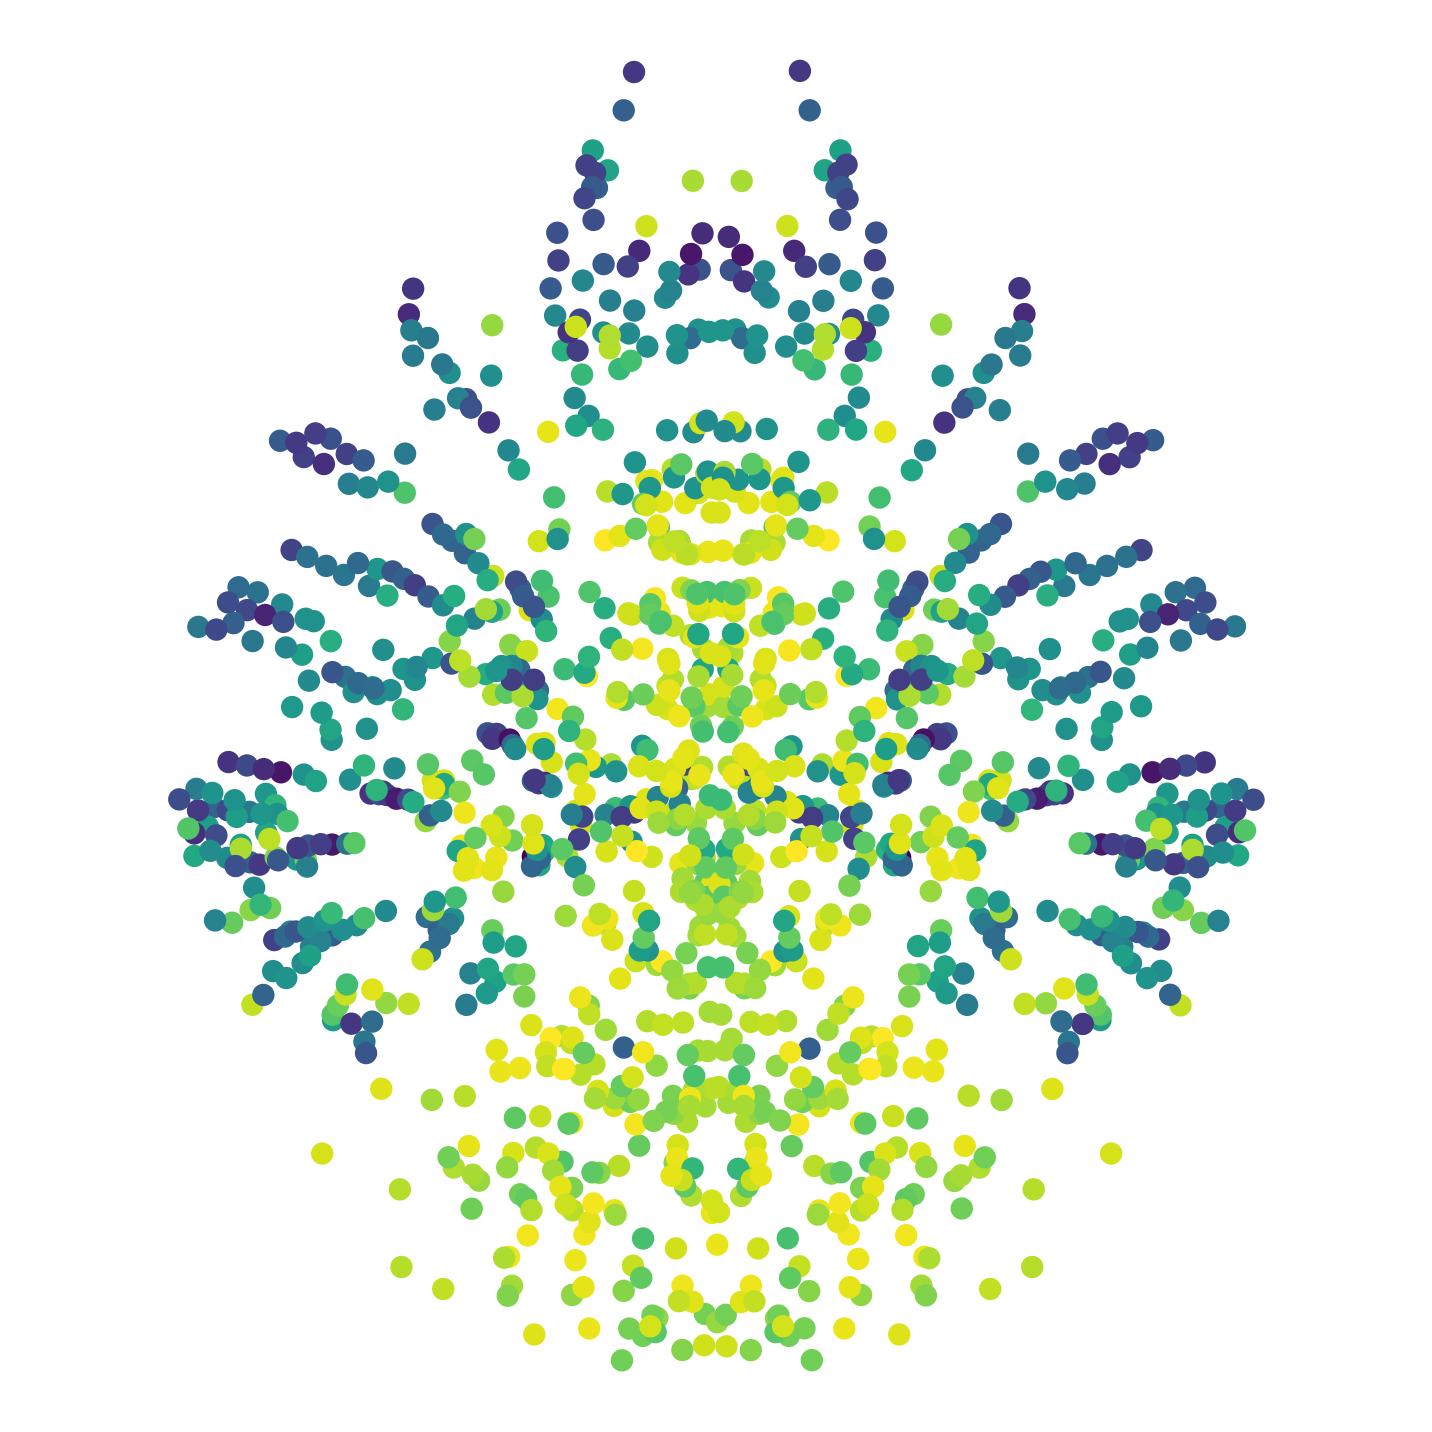

In [139]:
# atlasID が適切に設定されていることを確認する
# adata.obs に atlasID が含まれていることを前提にします
if 'atlasID' not in adata.obs.columns:
    adata.obs['atlasID'] = data_normalized.index

# pseudotime_df を adata.obs から作成し、インデックスを atlasID にする
pseudotime_df = pd.DataFrame(adata.obs[['atlasID', 'dpt_pseudotime']])

# pseudotime_df のインデックスを data_normalized のインデックス（atlasID）に基づいて設定
pseudotime_df = pseudotime_df.set_index('atlasID')

# data_normalized のインデックスに対応して pseudotime の値をマッピング
all_centroids['pseudotime'] = all_centroids['atlasID'].map(pseudotime_df['dpt_pseudotime'])

# pseudotime が NaN の場合は 0 で補完（必要に応じて）
all_centroids['pseudotime'] = all_centroids['pseudotime'].fillna(0)

# viridis_rカラーマップを使用して色情報を生成
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=all_centroids['pseudotime'].min(), vmax=all_centroids['pseudotime'].max())
all_centroids['colors'] = all_centroids['pseudotime'].apply(lambda x: cmap(norm(x)))

# 散布図をプロット
plt.figure(figsize=(20, 20))
sc = plt.scatter(all_centroids['X(um)'], all_centroids['Y(um)'], s=500, c=all_centroids['colors'], edgecolor='none')
#plt.title('Centroids of Left and Right Brain with Pseudotime Coloration')
#plt.xlabel('X (um)')
#plt.ylabel('Y (um)')
plt.axis('equal')  # 軸を等方的にする
plt.gca().invert_yaxis()  # Y軸を反転
plt.gca().spines['top'].set_visible(False)  # 上の軸線を非表示
plt.gca().spines['right'].set_visible(False)  # 右の軸線を非表示
plt.gca().spines['left'].set_visible(False)  # 左の軸線を非表示
plt.gca().spines['bottom'].set_visible(False)  # 下の軸線を非表示
#plt.colorbar(sc, label='Pseudotime from Abeta PCA')  # カラーバーを追加
plt.xticks([])  # X軸の目盛りを非表示
plt.yticks([])  # Y軸の目盛りを非表示

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Whole_brain_plot_of_Regional_Abeta_psedotime.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


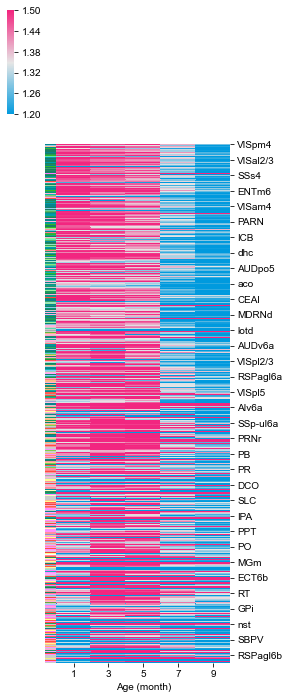

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot/100000#.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized, index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df,  cmap = cmap, row_colors=colorlist_671, vmin=1.2, vmax=1.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

# Adjust layout to avoid overlap and save as a single figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_after_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


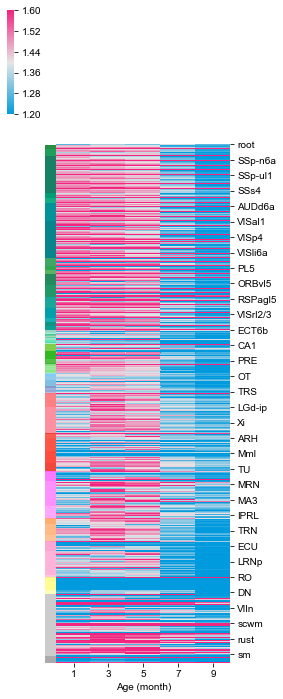

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot/100000#.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized, index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df, cmap=cmap, row_colors=colorlist_671, vmin=1.2, vmax=1.6, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_before_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [28]:
data_normalized

,APP_1m,APP_3m,APP_5m,APP_7m,APP_9m
atlasID,,,,,
1,103863.50,102970.75,116063.25,113349.75,115079.25
2,193134.75,214194.00,210542.50,189445.25,182820.75
6,133868.50,139378.50,136589.50,127689.50,123672.00
7,139897.50,147612.00,148273.75,130908.00,119188.75
9,155524.00,154741.25,153181.00,135897.00,127926.00
...,...,...,...,...,...
60850,125121.75,154021.50,151158.25,136072.25,133287.50
60854,154979.25,142725.75,158981.25,141087.25,141319.25
60858,147687.00,149868.25,151015.25,141217.25,125412.50


In [ ]:
# normalized microglia numberのやつのpseudotimeのsperman相関をとる

In [ ]:
# microgliosisの各peakをとる　→  microglia lossより先行しそうよね。

In [ ]:
# WTにおけるratioも計算してみる

#4_APPmodel_Ctr1m_1_2022_1104_1550
#4_APPmodel_Ctr1m_2_2022_1108_959
#4_APPmodel_Ctr1m_3_2022_1209_1751
#5_APPmodel_Ctr3m_1_2023_0113_1230
#5_APPmodel_Ctr3m_2_2023_0210_1142
#5_APPmodel_Ctr3m_3_2023_0227_1605
#4_APPmodel_Ctr3m_4_2023_0427_1444
#4_APPmodel_Ctr5m_1_2022_1026_252
#4_APPmodel_Ctr5m_2_2022_1028_2336
#4_APPmodel_Ctr5m_3_2022_1101_140
#4_APPmodel_Ctr5m_4_2023_0512_2057
#5_APPmodel_Ctr7m_1_2023_0206_1534
#5_APPmodel_Ctr7m_2_2023_0313_1111
#5_APPmodel_Ctr7m_3_2023_0331_2139
#4_APPmodel_Ctr7m_4_2023_0516_1559
#5_APPmodel_Ctr7m_5_2023_0522_2218
#5_APPmodel_Ctr9m_1_2023_0130_1607
#5_APPmodel_Ctr9m_2_2023_0216_2052
#5_APPmodel_Ctr9m_3_2023_0322_2014
#5_APPmodel_Ctr9m_4_2023_0518_1449
997
Coefficient: -0.026305740344328792, p-value: 0.7520581002667448
68
Coefficient: -0.026938551804322506, p-value: 0.7756404943289918
667
Coefficient: -0.027925150218648574, p-value: 0.7398666432957272
52192
Coefficient: -0.03933849754886203, p-value: 0.6317510187476273
52196
Coefficient: -0.034691930

/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: 0.21139269209685022, p-value: 0.15947731841312357
320
Coefficient: -0.035494912387388514, p-value: 0.6731122700255159
943
Coefficient: -0.03910822924463992, p-value: 0.6299742593937858
648
Coefficient: -0.036596426768301896, p-value: 0.6433403093270335
844
Coefficient: -0.029171769930251314, p-value: 0.7080117258339382
882
Coefficient: -0.03045026048396293, p-value: 0.6413646030300721
656
Coefficient: -0.037449806444610004, p-value: 0.6652878479157147
962


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04282794078014725, p-value: 0.6016728699064592
767
Coefficient: -0.03912859048023456, p-value: 0.628030874487311
1021
Coefficient: -0.02988574804780087, p-value: 0.7033300933598394
1085
Coefficient: -0.034487186092948395, p-value: 0.5851786371637302
558
Coefficient: -0.046932209936956175, p-value: 0.5770958317099644
838
Coefficient: -0.03806364582319038, p-value: 0.6339871710773693
654
Coefficient: -0.03397584388762535, p-value: 0.6734352621469806
702


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.036514798550554714, p-value: 0.6425598078918595
889
Coefficient: -0.02874506571955701, p-value: 0.714354921267221
929
Coefficient: -0.031284219527058274, p-value: 0.6287658115737111
981
Coefficient: -0.04081194201743155, p-value: 0.6206097073702457
201
Coefficient: -0.03986563309915085, p-value: 0.6183183068850333
1047
Coefficient: -0.036878208642364484, p-value: 0.6435212680946756
1070
Coefficient: -0.034485314412133934, p-value: 0.659618800166488
1038


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.030322831485395458, p-value: 0.6969825996876886
1062
Coefficient: -0.03335881128610232, p-value: 0.6110874505509479
1030
Coefficient: -0.03020690266449183, p-value: 0.7149946180749678
113
Coefficient: -0.03535367839563183, p-value: 0.6624384762125137
1094
Coefficient: -0.04122509880756169, p-value: 0.6031388392462418
1128
Coefficient: -0.035507445091992204, p-value: 0.65254043536471
478
Coefficient: -0.032709189285657685, p-value: 0.6739564146184156
510


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.045465339793863635, p-value: 0.47096495164127816
878
Coefficient: -0.04613393574917694, p-value: 0.599130636064179
657
Coefficient: -0.03984816903255287, p-value: 0.6233332379157666
950
Coefficient: -0.035872219008231586, p-value: 0.6553617756124772
974
Coefficient: -0.03510389111630069, p-value: 0.6562011826467191
1102
Coefficient: -0.03148357320446486, p-value: 0.6888493814172181
2
Coefficient: -0.02878708332514122, p-value: 0.668672139130496
450
Coefficient: -0.04127902641206304, p-value: 0.6167504687938897
854


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04052099348835934, p-value: 0.6149116714640814
577
Coefficient: -0.03984561501536453, p-value: 0.6159915054062937
625
Coefficient: -0.034350609127635774, p-value: 0.6607587937652664
945
Coefficient: -0.03247215660484319, p-value: 0.6763307798774469
1026
Coefficient: -0.028124204503964672, p-value: 0.6649728856863474
1006
Coefficient: -0.03940633364531824, p-value: 0.6301941125332344
670
Coefficient: -0.035646883007108054, p-value: 0.658998024715767
1086
Coefficient: -0.038277940310032045, p-value: 0.6238468658474635
1111
Coefficient: -0.04024389282784272, p-value: 0.6085385204202176
9


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03228235374486965, p-value: 0.6742905691144523
461
Coefficient: -0.017934508471817233, p-value: 0.7806926852622973
18693
Coefficient: -0.04589874568863474, p-value: 0.5742757855953308
18697
Coefficient: -0.03727014450058313, p-value: 0.6398470529793764
18701
Coefficient: -0.040984265186027206, p-value: 0.6023339464880157
18705
Coefficient: -0.037308299118868404, p-value: 0.6321448701723684
18709
Coefficient: -0.03281682307165456, p-value: 0.6704726859342556
18713
Coefficient: -0.034516329636420595, p-value: 0.5690342357732572
873
Coefficient: -0.05050492474802186, p-value: 0.558356865408943
806


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03986191955479067, p-value: 0.6197311340294154
1035
Coefficient: -0.03519219260249394, p-value: 0.6546586449705352
1090
Coefficient: -0.033820093886660275, p-value: 0.6678498740821941
862
Coefficient: -0.030017112708426386, p-value: 0.7008212809546213
893
Coefficient: -0.02391317079483806, p-value: 0.713958217141169
36
Coefficient: -0.04914773670976946, p-value: 0.5747569694803277
180
Coefficient: -0.053800988559216306, p-value: 0.5183713962806982
148
Coefficient: -0.05204404092945954, p-value: 0.5108169656862176
187
Coefficient: -0.043008863969442236, p-value: 0.5949220361559876
638


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03928793051645682, p-value: 0.6255443534441512
662
Coefficient: -0.03068968043231031, p-value: 0.647177640443842
897
Coefficient: -0.042277047964962754, p-value: 0.6263391701206154
1106
Coefficient: -0.04642415640682567, p-value: 0.5662503753502919
1010
Coefficient: -0.04450190940018298, p-value: 0.563462010727798
1058
Coefficient: -0.039147763006683454, p-value: 0.6218816892692505
857
Coefficient: -0.032463361249767196, p-value: 0.6815757271270122
849
Coefficient: -0.02232777340601198, p-value: 0.7337945155458108
527
Coefficient: -0.0472849063241856, p-value: 0.5818474034048111
600


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03930266692548127, p-value: 0.622510277816577
678
Coefficient: -0.03674666498993256, p-value: 0.6415487296426692
252
Coefficient: -0.03185159241920269, p-value: 0.68712051640782
156
Coefficient: -0.030791977003635403, p-value: 0.6910247484755394
243
Coefficient: -0.028099238943685927, p-value: 0.6720362123843001
735
Coefficient: -0.047397718127378315, p-value: 0.5811601175200762
251
Coefficient: -0.04088452660326589, p-value: 0.6105551689889912
816
Coefficient: -0.03501661597543169, p-value: 0.656864185513426
847
Coefficient: -0.03485445963426838, p-value: 0.6598621669395222
954


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03350338156459462, p-value: 0.6647512874609541
1005
Coefficient: -0.028490127795526055, p-value: 0.6690274804734049
696
Coefficient: -0.05871903167458653, p-value: 0.493913123533014
643
Coefficient: -0.04073699668122262, p-value: 0.6120844569856959
759
Coefficient: -0.04069518743462306, p-value: 0.6062029884967255
791
Coefficient: -0.03485399066012733, p-value: 0.6578821029583524
249
Coefficient: -0.029423887877063397, p-value: 0.6988360727368432
456
Coefficient: -0.03894076886836645, p-value: 0.5429228126677642
959
Coefficient: -0.04796043224634058, p-value: 0.5761266290411197
755


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.045142614795843805, p-value: 0.5727616012172855
990
Coefficient: -0.03942581154815483, p-value: 0.6163678994327776
1023
Coefficient: -0.036992257890846855, p-value: 0.64133143466359
520
Coefficient: -0.02967996895421718, p-value: 0.7023792815707401
598
Coefficient: -0.031973723704179974, p-value: 0.6178793911420094
1074
Coefficient: -0.049082245753821765, p-value: 0.5578066914655399
905
Coefficient: -0.0444307369039017, p-value: 0.581081675362962
1114
Coefficient: -0.04405072872324801, p-value: 0.5744041816244665
233


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03801153306242767, p-value: 0.6272770995011527
601
Coefficient: -0.030247084184383946, p-value: 0.6952119258738185
649
Coefficient: -0.036952839138603644, p-value: 0.5743967650029342
281
Coefficient: -0.044011361038466264, p-value: 0.6154210214401521
1066
Coefficient: -0.04274520546333992, p-value: 0.6034848300418567
401
Coefficient: -0.03383634568220789, p-value: 0.6606231555105292
433
Coefficient: -0.04240586028598615, p-value: 0.5931938734200692
1046
Coefficient: -0.036318523776272524, p-value: 0.6383132538023841
441
Coefficient: -0.03324433140625825, p-value: 0.6082996979789272
421


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04590702236236723, p-value: 0.5923819731402347
973
Coefficient: -0.04984993729642675, p-value: 0.5396804029752483
573
Coefficient: -0.04400665639686938, p-value: 0.5758781705361755
613
Coefficient: -0.03981783432158843, p-value: 0.6156160098142764
74
Coefficient: -0.038665180182810656, p-value: 0.6206155527278852
121
Coefficient: -0.03159086093705147, p-value: 0.641743483966568
593
Coefficient: -0.049991077604749086, p-value: 0.5597759016471435
821
Coefficient: -0.04508057991656884, p-value: 0.578757029769831
721
Coefficient: -0.042955301936609964, p-value: 0.5866169278264648
778


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04133426573442995, p-value: 0.6006254486572732
33
Coefficient: -0.040170010581730704, p-value: 0.6041283701979228
305
Coefficient: -0.03509494797688896, p-value: 0.5924480129963287
750
Coefficient: -0.0406898823155206, p-value: 0.642717816520417
269
Coefficient: -0.047400964604704346, p-value: 0.5637290415874379
869
Coefficient: -0.038097211603006144, p-value: 0.6035563629172889
902
Coefficient: -0.0374121056261869, p-value: 0.6438597938258297
377
Coefficient: -0.039956047733419944, p-value: 0.6080276544218357
393
Coefficient: -0.03497147780436458, p-value: 0.561774878307908
805


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04858933065576303, p-value: 0.5791442948929089
41
Coefficient: -0.048647371522187684, p-value: 0.5514889141749426
501
Coefficient: -0.04396844856713609, p-value: 0.5689391568632489
565
Coefficient: -0.04312560257853807, p-value: 0.586076575282236
257
Coefficient: -0.043200724192259406, p-value: 0.5749456122230899
469
Coefficient: -0.04331002538025438, p-value: 0.5066345338689635
31578
Coefficient: -0.05148085318029743, p-value: 0.5557358638737939
31582
Coefficient: -0.0481517279542075, p-value: 0.5538335253835804
31586
Coefficient: -0.040728420987414686, p-value: 0.6029692612894263
31590


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04253657367227933, p-value: 0.591459718910048
31594
Coefficient: -0.0399301196503191, p-value: 0.6094930086915782
31598
Coefficient: -0.04939226581704169, p-value: 0.4553251147861544
31632
Coefficient: -0.043636117756182334, p-value: 0.6183508674627946
31636
Coefficient: -0.04743762115364474, p-value: 0.5613257489719123
31640
Coefficient: -0.03621699749783321, p-value: 0.637498662123787
31644
Coefficient: -0.03966653086930999, p-value: 0.620311398212765
31648
Coefficient: -0.043066272891515545, p-value: 0.5820163332669697
31652
Coefficient: -0.03625557367722015, p-value: 0.5831791184155422
935


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04129466224083146, p-value: 0.6465621054975181
211
Coefficient: -0.0437724188516811, p-value: 0.592766559302913
1015
Coefficient: -0.038423996914702586, p-value: 0.6291535906287901
919
Coefficient: -0.03543800034251657, p-value: 0.6496272936134436
927
Coefficient: -0.051160833830666, p-value: 0.3768311909567422
588
Coefficient: -0.03676223580974001, p-value: 0.6751832310031027
296
Coefficient: -0.04209386652484521, p-value: 0.5998315568685705
772
Coefficient: -0.03579810459789753, p-value: 0.6522074664451256
810
Coefficient: -0.034021470764755264, p-value: 0.6571867989349153
819


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04134229006539534, p-value: 0.5081980667710758
171
Coefficient: -0.037307457937766686, p-value: 0.685800350012947
304
Coefficient: -0.04323192622974055, p-value: 0.5980922073684116
363
Coefficient: -0.044871166960100656, p-value: 0.5766853437382037
84
Coefficient: -0.038203606730684334, p-value: 0.6294135322049588
132
Coefficient: -0.02432998477467244, p-value: 0.710237917801346
707
Coefficient: -0.03824841748324424, p-value: 0.6777227836576314
556
Coefficient: -0.049502039956616985, p-value: 0.548023281424568
827
Coefficient: -0.04393642687275306, p-value: 0.5851952054284852
1054


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.035008046363012836, p-value: 0.6630478364331889
1081
Coefficient: -0.028722823216643274, p-value: 0.670615497206595
448
Coefficient: -0.05336050856426218, p-value: 0.5344530583164331
412
Coefficient: -0.03917711922247995, p-value: 0.6265232305226527
630
Coefficient: -0.03362336471782843, p-value: 0.6746975460968504
440
Coefficient: -0.03161780414109953, p-value: 0.6862879183863055
488
Coefficient: -0.03277514527248002, p-value: 0.6179656064761716
484
Coefficient: -0.03799083507998728, p-value: 0.6996333500720506
582
Coefficient: -0.05434301667777002, p-value: 0.5146561833350728
620


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04687300771984068, p-value: 0.5601147687023844
910
Coefficient: -0.033456002032832936, p-value: 0.6666264385034366
52977
Coefficient: -0.015347617104451742, p-value: 0.76626574384697
969
Coefficient: -0.05871552223692322, p-value: 0.5043957553311258
288
Coefficient: -0.05162318791842375, p-value: 0.5270303347857427
1125
Coefficient: -0.041710285436416104, p-value: 0.605299870823705
608
Coefficient: -0.03411820965382673, p-value: 0.663575829498853
680
Coefficient: -0.03690135243539062, p-value: 0.5699514572693288
996
Coefficient: -0.040190449953470556, p-value: 0.6529248373188901
328


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.039545844911807786, p-value: 0.6393578284622621
1101
Coefficient: -0.03842946752224465, p-value: 0.6351268136847357
783
Coefficient: -0.030769725170615794, p-value: 0.6930695096600442
831
Coefficient: -0.028936948546823642, p-value: 0.6539013527164752
120
Coefficient: -0.04991753449051644, p-value: 0.5726764067499559
163
Coefficient: -0.04952204468970992, p-value: 0.5490516866755317
344
Coefficient: -0.04140386606213569, p-value: 0.6071878886593391
314
Coefficient: -0.03791146640024149, p-value: 0.6304574003722194
355
Coefficient: -0.06830021687642546, p-value: 0.3187045903404064
704


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04068624366934457, p-value: 0.6566854188637434
694
Coefficient: -0.03747521774912003, p-value: 0.6575034652294671
800
Coefficient: -0.02722214455241255, p-value: 0.7329852196894953
675
Coefficient: -0.0304551594032737, p-value: 0.6762894511538451
699
Coefficient: -0.010092225175984341, p-value: 0.8169425733459919
671
Coefficient: -0.054237560575453835, p-value: 0.543246268781941
965
Coefficient: -0.05090112203327618, p-value: 0.5297616129321363
774
Coefficient: -0.04355697636841616, p-value: 0.5810865327141009
906
Coefficient: -0.0363557250145318, p-value: 0.6323714484323948
279


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03244628573686246, p-value: 0.539031443857192
442
Coefficient: -0.048548217418069674, p-value: 0.5701694810219021
434
Coefficient: -0.042833706127540894, p-value: 0.5931332756980521
610
Coefficient: -0.03792880641772272, p-value: 0.6325077256527563
274
Coefficient: -0.03834157158919662, p-value: 0.6202501990783635
330
Coefficient: -0.009130965406943768, p-value: 0.8589937695889953
542
Coefficient: -0.03864593397189626, p-value: 0.6563998450757401
430
Coefficient: -0.03892921446090796, p-value: 0.6308639923167871
687
Coefficient: -0.03649455260793508, p-value: 0.6483848397948861
590


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.036018917809742, p-value: 0.639674861661239
622
Coefficient: -0.05427643365813773, p-value: 0.3420380782689972
31550
Coefficient: -0.04518386968412492, p-value: 0.5893859901240195
31554
Coefficient: -0.038769644410055995, p-value: 0.632379566031821
31558
Coefficient: -0.042222306880646585, p-value: 0.5893241873549131
31562
Coefficient: -0.0379187708532436, p-value: 0.6287263089132673
31566
Coefficient: -0.03595410816699366, p-value: 0.639208959948591
31570
Coefficient: -0.027981400886471153, p-value: 0.6696678248300283
31604
Coefficient: -0.039887741302040834, p-value: 0.6292215472055361
31608


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03710184744871561, p-value: 0.643184611949418
31612
Coefficient: -0.04436934213347552, p-value: 0.5725836822177026
31616
Coefficient: -0.03715125118455268, p-value: 0.6383033968318375
31620
Coefficient: -0.034838797349274864, p-value: 0.6529100948418451
31624
Coefficient: -0.05247303367173806, p-value: 0.42914170829423065
97
Coefficient: -0.04991808070286854, p-value: 0.5733537966420306
1127
Coefficient: -0.04948912627372283, p-value: 0.5429353013797906
234
Coefficient: -0.042253127645575136, p-value: 0.5864251040945042
289
Coefficient: -0.04207780516891707, p-value: 0.5965431256254254
729


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03766505010780395, p-value: 0.6297982594888523
786
Coefficient: -0.03652259007969201, p-value: 0.5709520206792718
540
Coefficient: -0.04025225643278649, p-value: 0.6446663673878092
888
Coefficient: -0.042155576215620466, p-value: 0.599666442416773
692
Coefficient: -0.03210996499335259, p-value: 0.6843780730202895
335
Coefficient: -0.037653778071303, p-value: 0.6184898014491312
368
Coefficient: 0.11147594089902013, p-value: 0.158658186497437
836
Coefficient: -0.04255013066500973, p-value: 0.6335305514110063
427
Coefficient: -0.048016613063624765, p-value: 0.5545992835110474
988


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.041547703650508576, p-value: 0.6009419662646664
977
Coefficient: -0.042316936147051204, p-value: 0.5946711179231905
1045
Coefficient: -0.04374696965867358, p-value: 0.49752822221858983
698
Coefficient: -0.038338415857702715, p-value: 0.6432039043544766
507
Coefficient: -0.04770937501977022, p-value: 0.6002316450473237
188
Coefficient: -0.04941099118129461, p-value: 0.6026186534254805
196
Coefficient: -0.04126156896798101, p-value: 0.630455406124226
204
Coefficient: -0.04493188995725826, p-value: 0.6200228711693956
159
Coefficient: -0.03559603649510448, p-value: 0.6651278623491967
597
Coefficient: -0.04612332251533796, p-value: 0.5893101747298028
605


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04576835286631432, p-value: 0.6321510297597083
814
Coefficient: -0.043852695891784775, p-value: 0.5997887907635948
961
Coefficient: -0.03882787028497234, p-value: 0.6419501404245391
260
Coefficient: -0.05489499110782151, p-value: 0.5590409763509653
268
Coefficient: -0.05411706853668678, p-value: 0.5173709286595283
1139
Coefficient: -0.03905143970430029, p-value: 0.6187470570778224
639
Coefficient: -0.04846511647052856, p-value: 0.5844650184432599
655
Coefficient: -0.04873451685016925, p-value: 0.5744857840095969
663
Coefficient: -0.051559519012895995, p-value: 0.557360121033729
788


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.042498942002123764, p-value: 0.6257730292161219
566
Coefficient: -0.04503121762644995, p-value: 0.6089329684225382
1089
Coefficient: -0.03220187236596819, p-value: 0.591287031026569
382
Coefficient: -0.037739267471675754, p-value: 0.6459189512165449
423
Coefficient: -0.03732390191800354, p-value: 0.6238590767919119
463
Coefficient: -0.03390067662096939, p-value: 0.680256102836154
10703
Coefficient: -0.03756535062817992, p-value: 0.662275456545782
10704
Coefficient: -0.033665946521367326, p-value: 0.6655200758265822
632
Coefficient: -0.03187386174237435, p-value: 0.6934377712232545
982


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.04558276410315141, p-value: 0.5900108537835806
19
Coefficient: -0.031339246720061505, p-value: 0.7309834405936613
1121
Coefficient: -0.04459864035424863, p-value: 0.6280555069160239
20
Coefficient: -0.05162059811646777, p-value: 0.5489106783271702
52
Coefficient: -0.047254208637740894, p-value: 0.5569864840750017
139
Coefficient: -0.044268125748144614, p-value: 0.5835650192572812
28
Coefficient: -0.04626644933433236, p-value: 0.5607429157016421
526
Coefficient: -0.03836910968556465, p-value: 0.6788885758724077
543
Coefficient: -0.04614186902134082, p-value: 0.5876387214822796
664


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.04386149501175135, p-value: 0.5872351549269192
727
Coefficient: -0.04119394125904385, p-value: 0.6045151542794787
743
Coefficient: -0.04517690999897183, p-value: 0.5634841968807469
843
Coefficient: -0.052281492649359496, p-value: 0.542830620310603
1037
Coefficient: -0.04068613634557108, p-value: 0.6207011117580683
1084
Coefficient: -0.04617254467972821, p-value: 0.5867296171048317
502
Coefficient: -0.04181576012116982, p-value: 0.6050362301072629
48470
Coefficient: -0.042388129143343896, p-value: 0.6002257632834394
58447
Coefficient: -0.04198025032529137, p-value: 0.6377590751485478
48508


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.047613673934600045, p-value: 0.5600751672865074
703
Coefficient: -0.03340145665298521, p-value: 0.5967496898809983
583
Coefficient: -0.038156086252008274, p-value: 0.63724430580517
952
Coefficient: -0.03336551258450655, p-value: 0.6810640981058124
966
Coefficient: -0.03758756168276857, p-value: 0.6389806076228506
131
Coefficient: -0.049640425655322576, p-value: 0.5413471357977944
303
Coefficient: -0.041982803237072396, p-value: 0.6043024094240388
311
Coefficient: -0.046932230169070284, p-value: 0.5678005124795851
451
Coefficient: -0.042387650917097806, p-value: 0.6026103216114508
327


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.04392783096120097, p-value: 0.590169402282797
334
Coefficient: -0.04470174214906882, p-value: 0.5854067639096409
780
Coefficient: -0.04237729364395328, p-value: 0.6101845861871683
477
Coefficient: -0.03867542399174103, p-value: 0.6136932961588586
672
Coefficient: -0.029786418108352922, p-value: 0.717045451933511
56
Coefficient: -0.03971061014856327, p-value: 0.6320005559695903
998
Coefficient: -0.02802038449009552, p-value: 0.7306750290857101
754
Coefficient: -0.044216414618805454, p-value: 0.6218260191710838
250
Coefficient: -0.04477898178595681, p-value: 0.5952444566845171
258


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04361151371716446, p-value: 0.6103248682183513
266
Coefficient: -0.05050409954543242, p-value: 0.5603367261821972
310
Coefficient: -0.03414653773763329, p-value: 0.6741316787279124
333
Coefficient: -0.0307510828079324, p-value: 0.7181682044706855
23
Coefficient: -0.03441892872675044, p-value: 0.675424971560084
292
Coefficient: -0.029137007470607972, p-value: 0.7639405844322564
544
Coefficient: -0.037849765523765594, p-value: 0.6421429130177232
551
Coefficient: -0.041785505090005455, p-value: 0.6208024923978843
559
Coefficient: -0.03739477197068532, p-value: 0.6537098444819794
1105


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04132732010580005, p-value: 0.6085255335400372
403
Coefficient: -0.04840377841765646, p-value: 0.5723515150213629
803
Coefficient: -0.03352624079500797, p-value: 0.6626968995876916
1022
Coefficient: -0.03969122149379588, p-value: 0.6298632013612886
1031
Coefficient: -0.030192354085907498, p-value: 0.7216934661894308
342
Coefficient: -0.03744944490547362, p-value: 0.6469210481132847
298
Coefficient: -0.03273954665183985, p-value: 0.6899611576660123
564
Coefficient: -0.034533429019392645, p-value: 0.6823435819626875
596
Coefficient: -0.043439257392647986, p-value: 0.6197198769247005
581


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.039159601228907354, p-value: 0.6419172401416131
351
Coefficient: -0.04252017347991453, p-value: 0.610859664736862
287
Coefficient: -0.019146457963776647, p-value: 0.8119581688147822
549
Coefficient: -0.04154721841054381, p-value: 0.5268861854696433
629
Coefficient: -0.0555155561204064, p-value: 0.5040645962398856
685
Coefficient: -0.047352926045943114, p-value: 0.5638806497017509
718
Coefficient: -0.05039418960191351, p-value: 0.5422911896864067
725
Coefficient: -0.048218764876115705, p-value: 0.5454816634877134
733
Coefficient: -0.06220457293771443, p-value: 0.46150360301447
741


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.043388216499062784, p-value: 0.5965368637713716
56435
Coefficient: -0.04450458661964751, p-value: 0.5797899400857446
414
Coefficient: -0.03801156677898101, p-value: 0.6528241367290164
422
Coefficient: -0.04244125143839391, p-value: 0.5966284913054457
609
Coefficient: -0.052887283384925064, p-value: 0.5378936321703358
1044
Coefficient: -0.041633089331920545, p-value: 0.6044457686014206
1072
Coefficient: -0.047965136316855034, p-value: 0.5732383911936578
1079
Coefficient: -0.05648408793379893, p-value: 0.5057996043967536
1088
Coefficient: -0.047801822325178434, p-value: 0.5536573793207025
49664


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.047292683814115374, p-value: 0.5534478280345381
49668
Coefficient: -0.05421921183863361, p-value: 0.49207822922420735
49672
Coefficient: -0.049993016668940085, p-value: 0.5408213096056245
218
Coefficient: -0.046421007960600356, p-value: 0.5703998329230782
1020
Coefficient: -0.05393612982555569, p-value: 0.5088206140383769
1029
Coefficient: -0.050013121753682596, p-value: 0.5270469021004132
325
Coefficient: -0.04620217981834731, p-value: 0.5751692373450699
56551
Coefficient: -0.04691885309183574, p-value: 0.5543072169674066
255
Coefficient: -0.038822588706859854, p-value: 0.6424504838795286
1096


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04474931645370826, p-value: 0.5876468485927717
1104
Coefficient: -0.04187804297552908, p-value: 0.6112789089444974
64
Coefficient: -0.04796897506154308, p-value: 0.5675226498256004
1120
Coefficient: -0.0531204085545477, p-value: 0.5325317381963428
1113
Coefficient: -0.0418296087390235, p-value: 0.5982616658690577
155
Coefficient: -0.04135917190855386, p-value: 0.6118337376097605
59
Coefficient: -0.055066112663095496, p-value: 0.5140222592728396
362
Coefficient: -0.049934423962580875, p-value: 0.5456961017429182
366
Coefficient: -0.05375442272734686, p-value: 0.5165525105202131
1077


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.05020955409686244, p-value: 0.5297095483524094
149
Coefficient: -0.04726629788666618, p-value: 0.5826963324285068
15
Coefficient: -0.04159609085732346, p-value: 0.6149563813764853
181
Coefficient: -0.04738366656582758, p-value: 0.5667250121358971
56559
Coefficient: -0.045857886104172886, p-value: 0.5861651580583862
189
Coefficient: -0.04914636998663905, p-value: 0.5610219751266893
599
Coefficient: -0.05142366429686568, p-value: 0.545385757784997
907
Coefficient: -0.05168315132249936, p-value: 0.5296456631007928
575
Coefficient: -0.04443440512440811, p-value: 0.5823761423052899
930


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.047398299415213355, p-value: 0.5565008114933698
56563
Coefficient: -0.044091252897501945, p-value: 0.5891327661392247
262
Coefficient: -0.039263331673092164, p-value: 0.6324520850252338
27
Coefficient: -0.0477139016883028, p-value: 0.5520745336932835
56439
Coefficient: -0.047729145861189176, p-value: 0.5448375708479907
178
Coefficient: -0.04768861275893375, p-value: 0.5577811238681333
321
Coefficient: -0.03251580140881799, p-value: 0.6855983612739555
483
Coefficient: -0.03488670937260141, p-value: 0.6956203051648524
186
Coefficient: -0.044280346809365496, p-value: 0.5956772486359823
1097


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.038732000243311755, p-value: 0.6047702967801236
390
Coefficient: -0.021982412981396228, p-value: 0.7949809278508213
332
Coefficient: -0.03053483461098739, p-value: 0.7157617696247514
38
Coefficient: -0.047155143829906, p-value: 0.57377956223833
30
Coefficient: -0.052693219305042074, p-value: 0.5148569853802013
118
Coefficient: -0.0398068290552718, p-value: 0.6228207032216662
223
Coefficient: -0.0414413842523303, p-value: 0.6317833642544411
72
Coefficient: -0.03613552268401626, p-value: 0.671729121206776
263
Coefficient: -0.039950953659505975, p-value: 0.6394993684023829
272


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03725693383951759, p-value: 0.6923803744779473
830
Coefficient: -0.03916222305064911, p-value: 0.6378733669594164
452
Coefficient: -0.026137524111394445, p-value: 0.7625263706061879
523
Coefficient: -0.03846697832430429, p-value: 0.6385675594778338
763
Coefficient: -0.04158841192141783, p-value: 0.6833217840753083
914
Coefficient: -0.048197668195642494, p-value: 0.5555632933389014
1109
Coefficient: -0.034707199665653506, p-value: 0.6771546953566399
126
Coefficient: -0.04034934755777666, p-value: 0.6748402470394138
133
Coefficient: -0.04427031604595122, p-value: 0.6038384810116088
347


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03866666813798256, p-value: 0.6401311733435103
286
Coefficient: -0.05224440123544761, p-value: 0.5499753489946388
338
Coefficient: -0.033299746643139734, p-value: 0.6888242444079289
57699
Coefficient: -0.0366966462546071, p-value: 0.667880861940595
689
Coefficient: -0.032197891190603484, p-value: 0.7223940224262041
88
Coefficient: -0.03756164332747849, p-value: 0.6426869234320376
210
Coefficient: -0.02436957664420728, p-value: 0.7961457601802437
732
Coefficient: -0.022274272158820843, p-value: 0.7943927286881668
60647
Coefficient: -0.035264717916976676, p-value: 0.6993018599940619
60651


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04083028139841259, p-value: 0.6414975896210244
60655
Coefficient: -0.02905964200820852, p-value: 0.780595136714465
60659
Coefficient: -0.0436811509446442, p-value: 0.6539107496194977
525
Coefficient: -0.031953683441958564, p-value: 0.7082403090539582
1126
Coefficient: -0.028480261093531377, p-value: 0.741533246966658
1
Coefficient: -0.0456663411878704, p-value: 0.6304496612262678
515
Coefficient: -0.04655181927254267, p-value: 0.5758005357106359
980
Coefficient: -0.05113493265743446, p-value: 0.5298027320993682
1004
Coefficient: -0.046642364327547745, p-value: 0.5803850199662959
63


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03732289834915043, p-value: 0.6426418221264901
693
Coefficient: -0.0478896304706579, p-value: 0.5531195017918107
946
Coefficient: -0.04012439782221292, p-value: 0.6219460916450097
194
Coefficient: -0.03537475678498426, p-value: 0.6632038070397656
226
Coefficient: -0.033191295222153736, p-value: 0.6834144678622869
356
Coefficient: -0.03412970892525139, p-value: 0.6590460907399358
364
Coefficient: -0.03581571340060607, p-value: 0.6603721255818302
57704
Coefficient: -0.03214783384738999, p-value: 0.6870715171620402
173
Coefficient: -0.023963684661371745, p-value: 0.7836844647089112
470


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.031097030313581648, p-value: 0.7044817496393914
614
Coefficient: -0.03398013301535973, p-value: 0.6952079530792306
797
Coefficient: -0.04452542492985249, p-value: 0.5843933503332868
804
Coefficient: -0.05032047769594331, p-value: 0.5376139533259889
10671
Coefficient: -0.04511636316527169, p-value: 0.6501423385805348
313
Coefficient: -0.03842245540561079, p-value: 0.6252806541542842
851
Coefficient: -0.03963359203761657, p-value: 0.6437545258236954
842
Coefficient: -0.02791979154809313, p-value: 0.774615936491642
834
Coefficient: -0.03566303800008656, p-value: 0.6856350342020563
811


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.046108954353702825, p-value: 0.5844550666200405
820
Coefficient: -0.03517193667573454, p-value: 0.6793683449603308
828
Coefficient: -0.032362629656367325, p-value: 0.7104981311870224
580
Coefficient: -0.042093217314105945, p-value: 0.6170719847422536
271
Coefficient: -0.050427732729977845, p-value: 0.5362933242467299
874
Coefficient: -0.024329911390390296, p-value: 0.7769205082753727
460
Coefficient: -0.07749693841015187, p-value: 0.19078270017053164
59923
Coefficient: -0.0282844889489847, p-value: 0.753350382031069
381
Coefficient: -0.04030730825059724, p-value: 0.6247506434407089
749


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.0384083873304203, p-value: 0.6341056083242871
60830
Coefficient: -0.01901655448673819, p-value: 0.8107248770616229
246
Coefficient: -0.04115321249548526, p-value: 0.6112820934455323
128
Coefficient: -0.04889292763617496, p-value: 0.5411804708895804
26
Coefficient: -0.04387739848634005, p-value: 0.5889207972758055
42
Coefficient: -0.041670932531376124, p-value: 0.592577693451616
17
Coefficient: -0.04353570138764575, p-value: 0.5964730436049462
10
Coefficient: -0.03732504738988558, p-value: 0.6596541081718152
795
Coefficient: -0.04261708625161022, p-value: 0.6105263028499314
50


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04628890044453178, p-value: 0.5899461954376062
67
Coefficient: -0.06291387690250931, p-value: 0.4431962708681827
587
Coefficient: -0.046036896526721806, p-value: 0.5783380399172923
61277
Coefficient: -0.04414568388292375, p-value: 0.5875687137581491
215
Coefficient: -0.04780751282007473, p-value: 0.5588532916942439
531
Coefficient: -0.033941429928776544, p-value: 0.696449577392116
628
Coefficient: -0.031185573340358846, p-value: 0.7194124512842681
634
Coefficient: -0.040040144785832205, p-value: 0.6310508534059678
706
Coefficient: -0.03764818061411755, p-value: 0.650612294009854
1061


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04298294568518684, p-value: 0.5975950197078304
54203
Coefficient: -0.06121897365935815, p-value: 0.45864623053670006
616
Coefficient: -0.04188890730065444, p-value: 0.6233390070054172
214
Coefficient: -0.05420360617311189, p-value: 0.50880552329296
35
Coefficient: -0.03901506911417649, p-value: 0.6389007108771999
54211
Coefficient: -0.022526127421561074, p-value: 0.7840830883356366
975
Coefficient: -0.04748153576458319, p-value: 0.5603720098162109
115
Coefficient: -0.06109716548604612, p-value: 0.4776123127983357
60663
Coefficient: -0.04645787039475386, p-value: 0.5816064460573049
757


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.06355096596129553, p-value: 0.4516114677547604
231
Coefficient: -0.05329455746295946, p-value: 0.5270103496643317
66
Coefficient: -0.040687025057247424, p-value: 0.6238850158064584
75
Coefficient: -0.04763056880358283, p-value: 0.5831816223437192
58
Coefficient: -0.04971788284487219, p-value: 0.533514176100796
374
Coefficient: -0.035357104889408165, p-value: 0.658549603042823
1052
Coefficient: -0.04571323308571008, p-value: 0.5755056026531356
12
Coefficient: -0.051127023990700696, p-value: 0.5421268494067623
100
Coefficient: -0.0258145523582442, p-value: 0.6187956102265304
60834


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03956189884552692, p-value: 0.642028328685355
60838
Coefficient: -0.044867335054036804, p-value: 0.6053064877185798
60842
Coefficient: -0.03669917269576904, p-value: 0.6655767731559787
60846
Coefficient: -0.029018288745221835, p-value: 0.7286968684739645
60850
Coefficient: -0.041557801242837075, p-value: 0.6150261852376263
60854
Coefficient: -0.05840948048762955, p-value: 0.47722747439487767
60858
Coefficient: -0.03828881909141412, p-value: 0.6463157439056344
60862
Coefficient: -0.037899616484366516, p-value: 0.6378972825542332
197
Coefficient: -0.03509208544674252, p-value: 0.674597372899675
591


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04139549972878338, p-value: 0.6222704506546776
872
Coefficient: -0.04902285625277232, p-value: 0.5635181865830626
771
Coefficient: -0.04929593359499447, p-value: 0.5285020788069881
612
Coefficient: -0.04264170327986229, p-value: 0.609396668069105
7
Coefficient: -0.05645223383683932, p-value: 0.49890683122611773
867
Coefficient: -0.04999860374367116, p-value: 0.5408891798457283
123
Coefficient: -0.05583453492782603, p-value: 0.5043866536667978
122
Coefficient: -0.03781054230856082, p-value: 0.6557347426474287
105
Coefficient: -0.051993881094163176, p-value: 0.5361380861294651
114


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.03800381499425761, p-value: 0.6519896746749634
280
Coefficient: -0.04051979374726635, p-value: 0.6332179049873512
880
Coefficient: -0.05498224126819995, p-value: 0.532404310736344
59927
Coefficient: -0.07170295367153304, p-value: 0.42263110890845906
898
Coefficient: -0.04670410854843766, p-value: 0.5770250530661458
931
Coefficient: -0.03960149394652074, p-value: 0.6405377098092673
1093
Coefficient: -0.0640644084969185, p-value: 0.43703401044025914
318
Coefficient: -0.05107081402347158, p-value: 0.571307028923496
534
Coefficient: -0.05513618919624995, p-value: 0.4996492619402094
574


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.06378348325522712, p-value: 0.43381268315433374
621
Coefficient: -0.06669022418132821, p-value: 0.4213985719819636
54215
Coefficient: -0.059965650093626664, p-value: 0.46243034066346794
54219
Coefficient: -0.07330384726763008, p-value: 0.3815690611516303
54223
Coefficient: -0.05581669494917853, p-value: 0.4926120919286532
54227
Coefficient: -0.05936779611528719, p-value: 0.4744661089948718
679
Coefficient: -0.06258119044261916, p-value: 0.4567367898117786
147
Coefficient: -0.04841853874766873, p-value: 0.562174537473178
162
Coefficient: -0.04549895300624472, p-value: 0.5960494007149726
604


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.0509377546381948, p-value: 0.5459018015382955
146
Coefficient: -0.05639170891057401, p-value: 0.49070675069614517
238
Coefficient: -0.05880337373120815, p-value: 0.4916887948044088
350
Coefficient: -0.038381433861940775, p-value: 0.6544851918828147
358
Coefficient: -0.03891931683347653, p-value: 0.6451973987183369
354
Coefficient: -0.054101740920752914, p-value: 0.4997159578003857
207
Coefficient: -0.06518663437311485, p-value: 0.5833147739346791
96
Coefficient: -0.04021434048316809, p-value: 0.650220054111041
101
Coefficient: -0.03818086767307473, p-value: 0.676001808892848
711


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04017191356300493, p-value: 0.6663561162834357
1039
Coefficient: -0.03978480629026603, p-value: 0.7117898256560373
903
Coefficient: -0.043480658541802795, p-value: 0.6683503895369085
642
Coefficient: -0.05111885917944517, p-value: 0.5414201243579244
651
Coefficient: -0.05271750714435749, p-value: 0.5480750464070645
429
Coefficient: -0.05765437001513789, p-value: 0.5130547465387174
437
Coefficient: -0.06114371673529777, p-value: 0.4758965069537053
445
Coefficient: -0.06175360174225438, p-value: 0.46688785145299166
58451
Coefficient: -0.05072934531241149, p-value: 0.5990720499399167
653


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.07557289416346982, p-value: 0.38612433009798314
661
Coefficient: -0.05402074548971574, p-value: 0.523248306353174
576
Coefficient: -0.09204662601153438, p-value: 0.24370994307431124
939
Coefficient: -0.0441786040728786, p-value: 0.6036442673632452
143
Coefficient: -0.06350799163215752, p-value: 0.46138549461075345
839
Coefficient: -0.043383510441352774, p-value: 0.6273823895085862
1048
Coefficient: -0.08027468942505936, p-value: 0.3492374506985756
372
Coefficient: -0.039255996734516595, p-value: 0.651631868882146
83
Coefficient: -0.06461745781209846, p-value: 0.4606561417630712
136


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.07150622291863602, p-value: 0.39567498229575837
106
Coefficient: -0.06485115309515845, p-value: 0.43414547660247055
203
Coefficient: -0.08415899903086498, p-value: 0.31898743784995515
955
Coefficient: -0.06134757459705531, p-value: 0.48585998421943083
963
Coefficient: -0.04832990679528927, p-value: 0.5761293452787356
307
Coefficient: -0.07040896960382584, p-value: 0.40318852655137416
1098
Coefficient: -0.0586214330914131, p-value: 0.49142799284970656
1107
Coefficient: -0.06408792602732538, p-value: 0.4660776018137027
852
Coefficient: -0.06661177520783776, p-value: 0.4257314805182219
859


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.051719072491227334, p-value: 0.5389687849024476
970
Coefficient: -0.07591234517268347, p-value: 0.3822726740501699
978
Coefficient: -0.06525972381677933, p-value: 0.4445371877252393
177
Coefficient: -0.056447879420691405, p-value: 0.49806788922136896
169
Coefficient: -0.0606689360023861, p-value: 0.5136503180496241
1069
Coefficient: -0.052317703877925566, p-value: 0.5310667788633108
209
Coefficient: -0.0562709381760647, p-value: 0.509928226338213
202
Coefficient: -0.06535062083192515, p-value: 0.46352937681230877
225
Coefficient: -0.055618236015486246, p-value: 0.5287977462840108
217


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.06072207735915263, p-value: 0.4876054628467287
765
Coefficient: -0.05848511714480217, p-value: 0.5039564123331106
773
Coefficient: -0.04713444750084349, p-value: 0.6033962527846928
781
Coefficient: -0.0435957750953175, p-value: 0.6227793439518634
206
Coefficient: -0.05767353163184755, p-value: 0.5063038704798621
230
Coefficient: -0.05236995058071167, p-value: 0.5591316097088022
222
Coefficient: -0.08068094281147813, p-value: 0.3500565348293425
512
Coefficient: -0.03187538353924365, p-value: 0.6338740091233721
912
Coefficient: -0.045463059855272284, p-value: 0.6370114384762917
976


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.027536674624796035, p-value: 0.7729953080419321
984
Coefficient: -0.022958294200182992, p-value: 0.8092521552749091
1091
Coefficient: -0.026388919718437726, p-value: 0.7796015921952296
936
Coefficient: -0.028823213305413087, p-value: 0.7690759204707261
944
Coefficient: -0.023720700582666083, p-value: 0.80835880676206
951
Coefficient: -0.025286392762696886, p-value: 0.7920705264563755
957
Coefficient: -0.031222808271698706, p-value: 0.7541263781958896
968
Coefficient: -0.03543201357146659, p-value: 0.7332126861194871
1007
Coefficient: -0.02266300428669387, p-value: 0.8090968088267305
1056


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.027216359250895925, p-value: 0.7770234989423136
1064
Coefficient: -0.02342300533030746, p-value: 0.8089832924058121
1025
Coefficient: -0.020755224738981528, p-value: 0.8289683011645239
1033
Coefficient: -0.03451846408125009, p-value: 0.7199396576993484
1041
Coefficient: -0.030464659455585453, p-value: 0.7603679729647861
1049
Coefficient: -0.030867833362909616, p-value: 0.7566802008207956
989
Coefficient: -0.045356079584484406, p-value: 0.6001492328905975
91
Coefficient: -0.03844855347899551, p-value: 0.6570087407213153
846
Coefficient: -0.042248440998950046, p-value: 0.6268192968382436
58455


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.060893194656670396, p-value: 0.48009819152559513
1009
Coefficient: -0.038326849038962246, p-value: 0.6252348526974822
949
Coefficient: 0.16025488568588264, p-value: 0.11471665833728403
1016
Coefficient: -0.0589009938027534, p-value: 0.5671472909402988
665
Coefficient: -0.034150882615323376, p-value: 0.6934064379015317
538
Coefficient: -0.031269047555804924, p-value: 0.7105975960277379
900
Coefficient: -0.03653714648456324, p-value: 0.661207667912774
848
Coefficient: -0.14839849739361297, p-value: 0.22317119280666967
916
Coefficient: -0.029071116348422063, p-value: 0.7216048116218178
336


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04571894997903311, p-value: 0.5825036740900316
117
Coefficient: -0.050636001263666075, p-value: 0.5999594502283931
125
Coefficient: -0.03218973452801626, p-value: 0.7249595346513851
832
Coefficient: -0.05167809345856007, p-value: 0.4822742558420609
62
Coefficient: -0.054341430689402836, p-value: 0.4780343669790776
158
Coefficient: -0.032713857787458195, p-value: 0.6883573818580233
911
Coefficient: -0.06230825881990854, p-value: 0.35613697555901014
93
Coefficient: -0.03352659774851721, p-value: 0.7009065478536997
229


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.04761254214658335, p-value: 0.6284720247081583
794
Coefficient: -0.05054046086054358, p-value: 0.5727699030476967
798
Coefficient: -0.05814339840918347, p-value: 0.48225579972073424
1116
Coefficient: -0.06635121332576484, p-value: 0.4634894418925421
413
Coefficient: -0.04794645875302459, p-value: 0.5843842087130142
841
Coefficient: -0.04848390476638608, p-value: 0.5535601037228339
506
Coefficient: -0.03267729912763371, p-value: 0.6486017855041266
658
Coefficient: -0.034304824346890646, p-value: 0.6791451997695487
633
Coefficient: -0.058016301922026586, p-value: 0.49505195169233723
482


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.014274065588135827, p-value: 0.8798906186312601
237
Coefficient: -0.036010573984950875, p-value: 0.6492862589568176
380
Coefficient: -0.07637475084552155, p-value: 0.492211887327798
697
Coefficient: -0.05290151950534762, p-value: 0.511997696191031
744
Coefficient: -0.04176923298195042, p-value: 0.6211423713413591
326
Coefficient: -0.05311912207519158, p-value: 0.5102634594372037
812
Coefficient: -0.05274828624803929, p-value: 0.5393631191310533
850
Coefficient: -0.04321865298209648, p-value: 0.6003003057284049
866
Coefficient: -0.04493813219589235, p-value: 0.5784081135836087
78


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.037511836410800116, p-value: 0.6983130135780252
1123
Coefficient: -0.053690576237405724, p-value: 0.5532716727075213
553
Coefficient: -0.04876363944967629, p-value: 0.5992976856104681
728
Coefficient: -0.03715674307118139, p-value: 0.6566555373050671
48512
Coefficient: -0.0426333142848468, p-value: 0.5087991503977674
956
Coefficient: -0.04032613496402098, p-value: 0.6204503488793021
579
Coefficient: -0.030614366790071026, p-value: 0.6620903234761747
964
Coefficient: -0.03521463168825565, p-value: 0.6253072810091014
1108
Coefficient: -0.04355690930239966, p-value: 0.6012322232448224
971


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.03818678038545568, p-value: 0.632904695162883
48516
Coefficient: -0.043804428825282765, p-value: 0.5925311290932842
986
Coefficient: -0.04351549047949773, p-value: 0.5961354339055698
784
Coefficient: -0.04395007010964427, p-value: 0.5969236904412931
6
Coefficient: -0.0418376548074928, p-value: 0.6173836007729563
924
Coefficient: -0.04047039567168621, p-value: 0.6357862550422139
190
Coefficient: -0.049528510948901844, p-value: 0.5690225893569254
198
Coefficient: -0.07236521461778024, p-value: 0.4388360667705491
1092
Coefficient: -0.030959217760156522, p-value: 0.6271178022663384
48520
Coefficient: -0.04261899230550723, p-value: 0.5948200399442656
48524
Coefficient: -0.038688828292708435, p-value: 0.6017218195688859
102
Coefficient: -0.035301984688505816, p-value: 0.6590216147719168
1051
No non-zero data available for atlas ID 1051. Skipping...
1060
Coefficient: -0.03355339404958396, p-value: 0.5901662836276576
1043
Coefficient: -0.07137434980126878, p-value: 0.3840622646

/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.037712651311050796, p-value: 0.6201511190092399
466
Coefficient: -0.03505667526917703, p-value: 0.5816278188643167
530
Coefficient: -0.05183395184022016, p-value: 0.5158198704825102
603
Coefficient: -0.03925626407346938, p-value: 0.6526629761284681
428
Coefficient: -0.02864261819960663, p-value: 0.7037545027005225
436
Coefficient: -0.043678953778303636, p-value: 0.5860836390716238
443
Coefficient: -0.04567798964364524, p-value: 0.5778547847220654
449
Coefficient: -0.032110683924538475, p-value: 0.6860630725112165
301
Coefficient: -0.04433706557759052, p-value: 0.5851530421255331
48528


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Coefficient: -0.0361324359688523, p-value: 0.642550668872161
54
Coefficient: -0.006860155549211528, p-value: 0.8990945313373074
349
Coefficient: -0.03416411815297874, p-value: 0.5981878258531936
753
Coefficient: -0.04887773315966126, p-value: 0.5435184634183765
690
Coefficient: -0.04790667235835287, p-value: 0.5528790671271835
681
Coefficient: -0.05335754067209231, p-value: 0.4625635289826384
673
Coefficient: -0.024635700712900225, p-value: 0.7540164702004644
802
Coefficient: -0.043114319965238616, p-value: 0.6058378029387688
595
Coefficient: -0.046790077815910824, p-value: 0.5563740682548596
611


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

Coefficient: -0.031594373867890505, p-value: 0.7256327046818414
81
Coefficient: -0.04787790104576352, p-value: 0.5895161147051329
98
Coefficient: -0.05529369271356022, p-value: 0.42826962040534067
108
Coefficient: -0.048018304004585115, p-value: 0.6266729141508693
129
Coefficient: -0.03939222000868392, p-value: 0.6567643696005192
140
Coefficient: -0.050535570626209926, p-value: 0.6197141576072854
145
Coefficient: -0.04070593011703694, p-value: 0.658706843488051
153
Coefficient: -0.04358545956758385, p-value: 0.6269732186783392
164
Coefficient: 0.05778896661041256, p-value: 0.6070972013342877


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mitani/my_env

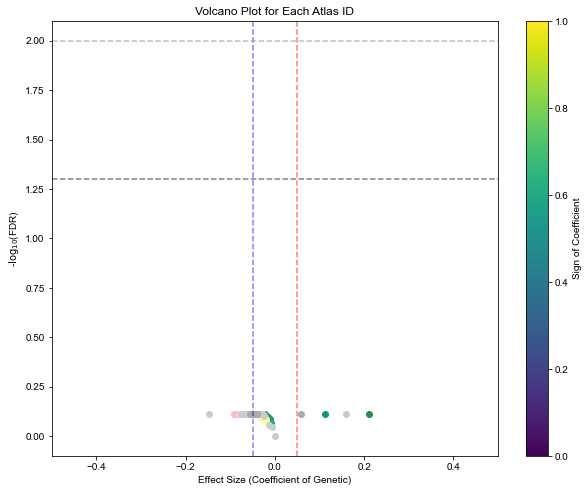

In [9]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import rpy2.robjects as robjects
# Rのインスタンスを取得
r = robjects.r
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# Rのライブラリをロード
r = robjects.r
r('library(MASS)')
import numpy as np
import rpy2.robjects as robjects
# Rのインスタンスを取得
r = robjects.r
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import rpy2.robjects as ro
# Rのライブラリをロード
r = robjects.r
r('library(MASS)')

def run_glm (data):
    #try:
    # R環境にデータフレームを渡す
    ro.globalenv['data'] = pandas2ri.py2rpy(data)
    # pdfClusterを実行
    r_code = '''
    library(MASS)
    model <- glm.nb('log_All_cell_count ~ Age', data = data)
    coef <- summary(model)$coefficients["Age", "Estimate"]
    p_value <- summary(model)$coefficients["Age", "Pr(>|z|)"]
    c(coef, p_value)
    '''
    #results_ <- summary(model)
    #results_ <- summary(model)
    #p_value <- summary(model)$Coefficients["Genetic", "Pr(>|z|)"]
    #coef <- summary(model)$Coefficients["Genetic", "coef"]
    ro.r(r_code)

    results = ro.r(r_code)

    coef = results[0]
    p_value = results[1]
    print(f"Coefficient: {coef}, p-value: {p_value}")
    #except:
    #    coef, p_value = 0.0, 1.0
    #    print(f"Coefficient: {coef}, p-value: {p_value}")
    return coef, p_value

def run_linear_regression(data):
    # R環境にデータフレームを渡す
    ro.globalenv['data'] = pandas2ri.py2rpy(data)
    # lmを実行
    r_code = '''
    library(stats)  # lm() 関数を使うために必要
    model <- lm(log_All_cell_count ~ Age, data = data)
    coef <- summary(model)$coefficients["Age", "Estimate"]
    p_value <- summary(model)$coefficients["Age", "Pr(>|t|)"]
    c(coef, p_value)
    '''
    results = ro.r(r_code)
    
    coef = results[0]
    p_value = results[1]
    print(f"Coefficient: {coef}, p-value: {p_value}")
    
    return coef, p_value

# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/HSI_results.csv" #"/Regional_cellome4_WM_mask_ver1_volume_revised.csv"

            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = pd.read_csv(cellome_file)
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df_list.append(df)
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()


# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["WT_1m", "WT_3m","WT_5m", "WT_7m", "WT_9m", ] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#healthy_sample_info = [(s, c) for c in ["WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in [  "APP_7m", "APP_9m"] for s in conditions[c]]

# データを読み込む
healthy_data = load_data(healthy_sample_info)
#disease_data = load_data(disease_sample_info)

# サンプルごとの総和で正規化
#healthy_data['Total_Iba1'] = healthy_data.groupby('Sample')['Iba1+ density (/mm3)'].transform('sum')
#healthy_data['Iba1_ratio'] = healthy_data['Iba1+ density (/mm3)'] / healthy_data['Total_Iba1']
healthy_data['Total_Iba1'] = healthy_data.groupby('Sample')['A_value'].transform('sum')
healthy_data['Iba1_ratio'] = healthy_data['A_value'] / healthy_data['Total_Iba1']

#healthy_data['Total_NeuN'] = healthy_data.groupby('Sample')['NeuN_cell_count'].transform('sum')
#healthy_data['NeuN_ratio'] = healthy_data['NeuN_cell_count'] / healthy_data['Total_NeuN']

# AgeとGeneticの列を追加
healthy_data['Age'] = healthy_data['Condition'].str.extract('(\d+)m').astype(int)
healthy_data['Genetic'] = 0  # Healthyは0
#disease_data['Age'] = disease_data['Condition'].str.extract('(\d+)m').astype(int)
#disease_data['Genetic'] = 1  # Diseaseは1



# データを結合
#all_data = pd.concat([healthy_data, disease_data])
all_data = healthy_data #disease_data

all_data.rename(columns={"Atlas_ID": "atlasID"}, inplace=True)

#all_data = normalize_and_calculate_difference(all_data)
all_data['log_All_cell_count'] = 0
# 全サンプルにわたるAgeの平均を計算
#mean_age = all_data['Age'].mean()
#print(mean_age)
#all_data["Age"] = all_data["Age"] - mean_age

# 線形回帰モデルの作成
results = {}
for atlas_id in all_data['atlasID'].unique():
    print(atlas_id)
    data = all_data[all_data['atlasID'] == atlas_id]
    
    
    #data['log_All_cell_count'] = np.round(data['Iba1+ density (/mm3)']) #np.round(data['Iba1_ratio'] *1000)
    data['log_All_cell_count'] = data['Iba1_ratio'] *1000
    #data['log_All_cell_count'] = np.round(data['NeuN_ratio'] *1000)
    
    data = data.dropna(subset=['log_All_cell_count'])
    
    all_data['log_All_cell_count'][all_data['atlasID'] == atlas_id] = data['log_All_cell_count'].copy()
    if data['log_All_cell_count'].sum() <= 0.0:
        results[atlas_id] = [0.0, 1.0]
        print(f"No non-zero data available for atlas ID {atlas_id}. Skipping...")
        continue
    results[atlas_id] = run_glm(data)

volcano_data = pd.DataFrame({
    'AtlasID': list(results.keys()),
    'coef': [result[0] for result in results.values()],
    'pvalue': [result[1] for result in results.values()]

})

# BH法による多重検定補正
volcano_data['pvalue'][volcano_data['pvalue'] == 0.0] = 1.0
_, p_adjusted, _, _ = multipletests(volcano_data['pvalue'], method='fdr_bh')

# 補正後のp-valueをデータフレームに追加
volcano_data['adjusted_pvalue'] =  p_adjusted
volcano_data['-log10(adjusted_pvalue)'] = -np.log10(volcano_data['adjusted_pvalue'])

# ID を基準にして volcano_data に RGB 値をマージ
volcano_data = pd.merge(volcano_data, data_GO[['id', 'R', 'G', 'B']], left_on='AtlasID', right_on='id', how='left')

# RGB 値を正規化
volcano_data['color'] = volcano_data.apply(lambda row: (row['R']/255, row['G']/255, row['B']/255), axis=1)

#volcano_data['log2(coef)'] = np.log2(volcano_data['coef'])

###########################

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

# ボルカノプロットの描画
plt.figure(figsize=(10, 8))
for _, row in volcano_data.iterrows():
    plt.scatter(row['coef'], row['-log10(adjusted_pvalue)'], color=row['color'])

plt.xlabel("Effect Size (Coefficient of Genetic)")
plt.ylabel(r'-$\log_{10}$(FDR)')  # LaTeX形式で下付き文字を使用
plt.title('Volcano Plot for Each Atlas ID')
plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,10)
plt.axvline(x=-0.05, color='blue', linestyle='--', alpha = 0.5)
plt.axvline(x=0.05, color='red', linestyle='--', alpha = 0.5)
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', alpha = 1.0)
plt.axhline(y=-np.log10(0.01), color='grey', linestyle='--', alpha = 0.5)
plt.colorbar(label='Sign of Coefficient')
plt.show()    


0
0


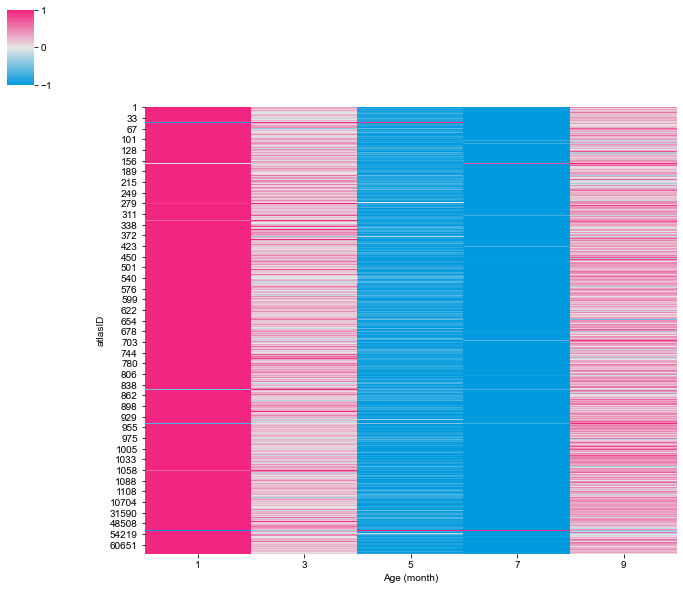

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.colors as mcolors
import json


# Prepare sample info
sample_info = [(s, c) for c in ["WT_1m", "WT_3m","WT_5m", "WT_7m", "WT_9m", ] for s in conditions[c]]
column_order = ["WT_1m", "WT_3m","WT_5m", "WT_7m", "WT_9m", ]

# Load and extract data
data = all_data[(all_data["Genetic"] == 0)] #load_and_extract_data(sample_info, conditions)

# Pivot the data for heatmap and calculate mean density for each atlasID and condition
data_pivot = data.pivot_table(index='atlasID', columns='Condition', values='log_All_cell_count', aggfunc='mean')

# Fill NaN with column means and check if entire columns were NaN
data_pivot = data_pivot.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Reorder columns based on specified order
data_pivot = data_pivot[column_order]

# Ensure the data is numeric
data_pivot = data_pivot.apply(pd.to_numeric, errors='coerce')

# Normalize data by row using Z-score
data_normalized = data_pivot.apply(zscore, axis=1, nan_policy='omit')

# Convert the list of values into a DataFrame with numeric values
data_normalized = pd.DataFrame(data_normalized.tolist(), index=data_pivot.index, columns=data_pivot.columns)

# Handle any potential NaN or inf values
data_normalized = data_normalized.fillna(0).replace([np.inf, -np.inf], 0)

def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

colorlist = []

# Assuming data_GO and its 'id' column are defined elsewhere in the code
for atlas_id in data_pivot.index:
    for i in range(len(data_GO)): # Adjust length to the actual number of rows in data_GO
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# Using the new custom colormap
cmap = create_custom_cmap()

# Validate data before plotting
print(data_normalized.isnull().sum().sum())  # Should be 0
print(np.isinf(data_normalized).sum().sum())  # Should be 0

# Create cluster map and capture the Axes object
clustergrid = sns.clustermap(data_normalized, method="average", cmap=cmap, vmin=-1, vmax=1, row_cluster=False, col_cluster=False, 
                             figsize=(12, 10), cbar_kws={'ticks': [-1, 0, 1]})

# Customize the x-axis labels
clustergrid.ax_heatmap.set_xticklabels([str(x).replace("WT_", "").replace("m", "") for x in column_order],)  # Replaces 'APP_1m' with '1', etc.
clustergrid.ax_heatmap.set_xlabel('Age (month)', )  # Change 'Condition' to 'Age (month)'

# Move atlasID to the left side
clustergrid.ax_heatmap.yaxis.tick_left()  # Move y-axis labels to the left
clustergrid.ax_heatmap.yaxis.set_label_position("left")  # Set the y-axis label position to left

# PDFとして図を保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.6/WT_Microglia_gradient_heatmap.pdf', 
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [11]:
# CSVファイルとして保存
data_pivot.to_csv('/export3/Imaging/ds4_Data4/Region/WT_Whole_brain_normalized_Microglia_ratio_Iba1_microgliosis_HSI_all.csv', index=True)

Start time: 2024-12-16 17:30:26.795383
0      0.653354
1      0.479496
2      0.367052
3      0.729541
4      0.435855
         ...   
665    0.365283
666    0.735988
667    0.343275
668    0.457793
669    0.604225
Name: dpt_pseudotime, Length: 670, dtype: float32


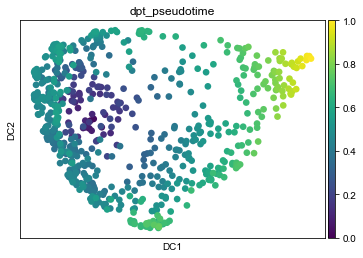

End time after X: 2024-12-16 17:30:27.379930
Duration for UMAP: 0:00:00.584547


In [59]:
import datetime
import pandas as pd
import numpy as np
from scipy.stats import zscore
import anndata
import scanpy as sc

start_time = datetime.datetime.now()
print("Start time:", start_time)

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_Whole_brain_normalized_Microglia_ratio_Iba1_microgliosis_HSI_all.csv', index_col='atlasID')

# 欠損値を各列の平均値で埋める
data_pivot = X#.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアでデータを正規化し、ゼロ分散を持つ行に対してNaNを0に置換
data_normalized = data_pivot.apply(zscore, axis=1).fillna(0)

# 各行がリストになっているので、それを展開して2次元のnumpy配列に変換
X_matrix = np.vstack(data_normalized)

# 無効な値（NaNや無限大）が含まれていないか確認し、置換
X_matrix_cleaned = np.nan_to_num(X_matrix, nan=0, posinf=0, neginf=0)

# AnnDataオブジェクトに変換
adata = anndata.AnnData(X_matrix_cleaned)

# 最近傍グラフの計算
sc.pp.neighbors(adata, use_rep='X', n_neighbors=15)

# ルートセルの設定
adata.uns['iroot'] = 240#597 #532 #634

# 拡散マップの計算
sc.tl.diffmap(adata)

# 疑似時間の計算
sc.tl.dpt(adata)

# 疑似時間の表示
print(adata.obs['dpt_pseudotime'])

# 拡散マップを表示
sc.pl.diffmap(adata, color=['dpt_pseudotime'], cmap='viridis',show=False)

# plt.savefigで直接PDFに保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Abeta_pseudotime_diffusion_map.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot (not necessary if it's already saved, but optional)
plt.show()


# 実行時間の計測
end_time1 = datetime.datetime.now()
print("End time after X:", end_time1)
print("Duration for UMAP:", end_time1 - start_time)


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


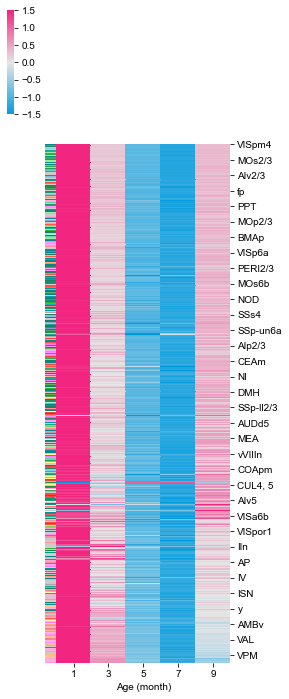

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df,  cmap = cmap, row_colors=colorlist_671, vmin=-1.5, vmax=1.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

# Adjust layout to avoid overlap and save as a single figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_after_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [7]:
X 

,WT_1m,WT_3m,WT_5m,WT_7m,WT_9m
atlasID,,,,,
1,1.061173,0.786666,0.643342,0.606140,0.776606
2,1.931942,1.635025,1.237151,1.190723,1.688302
6,1.311133,1.073895,0.793415,0.750469,1.041989
7,1.403256,1.082761,0.828031,0.715453,1.006223
9,1.558145,1.207878,0.937232,0.912184,1.292673
...,...,...,...,...,...
60850,1.393600,1.065624,0.782203,0.796592,1.073187
60854,1.451718,1.130044,0.797011,0.822400,0.976725
60858,1.300868,1.042084,0.859401,0.753966,1.047992


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


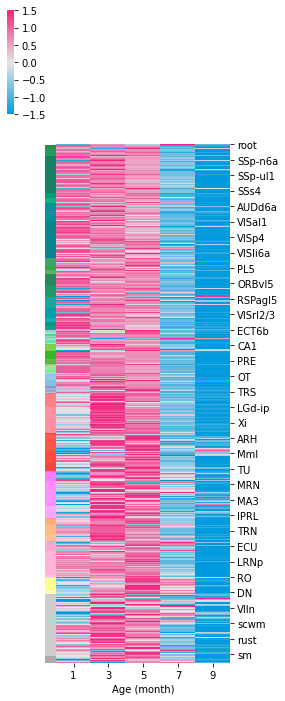

In [67]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
# カスタムカラーマップを作成
def create_custom_cmap():
    colors = [(0.0, 154/255, 222/255), (0.9, 0.9, 0.9), (0.95, 0.15, 0.5)] 
    #colors = [(0/255,180/255,255/255), (0/255,80/255,150/255), (190/255, 190/255, 190/255), (100/255,255/255, 0/255), (0,255/255, 0/255)]  # Using Matplotlib's named colors
    # Alternatively, you can use RGB tuples like:
    # colors = [(0, 0, 1), (0.5, 0.5, 0.5), (0, 1, 0)]  # RGB for Blue, Gray, Green
    cmap_name = "custom_cmap"
    return mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df, cmap=cmap, row_colors=colorlist_671, vmin=-1.5, vmax=1.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_before_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

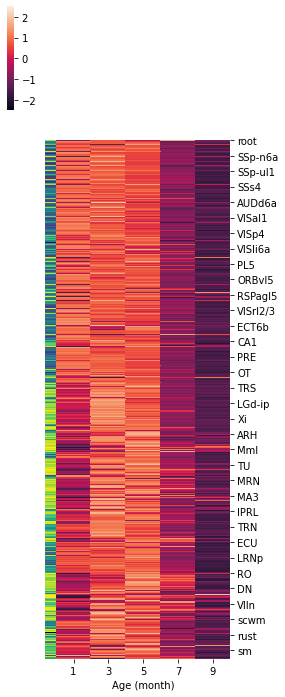

In [68]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# data_GO の id の順番に従って並び替える
sorted_order = data_GO['id']  # 並び替え順
sorted_data_df = sorted_data_df.reindex(sorted_order)

# sorted_data_df.indexに対応するdpt_pseudotimeを取得するためにマッピング
sorted_pseudotime_full = pd.DataFrame(merged_data[['atlasID', 'dpt_pseudotime']])

# sorted_data_df のインデックス（atlasID）に基づいて pseudotime を並べ替える
sorted_pseudotime_full = sorted_pseudotime_full.set_index('atlasID').reindex(sorted_data_df.index)

# Viridisカラーマップを使って pseudotime_colors を設定
viridis = plt.cm.get_cmap('viridis', 256)
norm = plt.Normalize(vmin=0, vmax=1)
pseudotime_colors = viridis(norm(sorted_pseudotime_full['dpt_pseudotime']))

# プロットをクリアするために挿入
plt.clf()

# clustermapプロット
g = sns.clustermap(sorted_data_df, row_colors=pseudotime_colors, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)

# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

if 1==0:
    # カラーバーの小さな軸を作成
    cbar_ax = g.fig.add_axes([1, 0.4, 0.025, 0.125])  # 左からの位置, 下からの位置, 横幅, 縦幅

    # カラーバーを設定
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=viridis), cax=cbar_ax, label='Pseudotime')

    # 枠線を消す
    cbar.outline.set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_before_Pseudotime_reordered_with_pseudotime_annotation.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


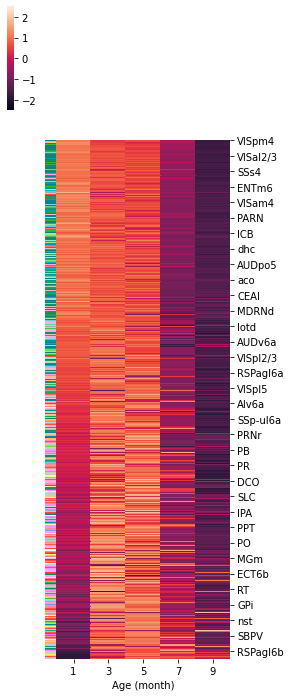

In [69]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# colorlist の生成（atlasID と一致させる）
colorlist = []
for atlas_id in sorted_data_df.index:
    if atlas_id in data_GO['id'].values:
        match = data_GO[data_GO['id'] == atlas_id]
        color = (match['R'].values[0] / 255, match['G'].values[0] / 255, match['B'].values[0] / 255)
        colorlist.append(color)

# 色リストがソートされたインデックスに対応しているかを確認
if len(colorlist) == len(sorted_data_df):
    colorlist_671 = colorlist
else:
    print(f"色リストの長さがデータと一致していません。"
          f"colorlist length: {len(colorlist)}, data length: {len(sorted_data_df)}")

# カスタムカラーマップを作成
def create_custom_cmap():
    # Colors: cyan, black, yellow
    colors = ["#00ffff", "#000000", "#ffff00"]
    cmap_name = "custom_cmap"
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

cmap = create_custom_cmap()

# clustermapプロット
g = sns.clustermap(sorted_data_df,  row_colors=colorlist_671, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)  # デフォルトの位置に x の ticks を配置
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)  # ラベルを 1, 3, 5, 7, 9 に変更

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)
# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

# Adjust layout to avoid overlap and save as a single figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_after_Pseudotime_reordered.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


/home/mitani/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

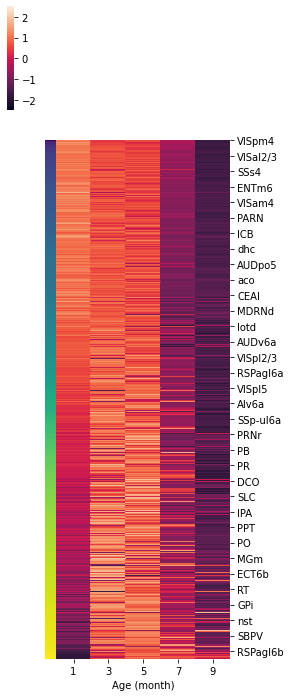

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 欠損値を列ごとの平均で埋める
data_pivot = X.apply(lambda col: col.fillna(col.mean()) if not col.isnull().all() else col.fillna(0))

# Zスコアで正規化し、NaNを0で置換
data_normalized = data_pivot.apply(zscore, axis=1)

# リスト状のデータを各列に展開
data_normalized_df = pd.DataFrame(data_normalized.tolist(), index=data_normalized.index)

# NaN 値を 0 で置換
data_normalized_df = data_normalized_df.fillna(0)

# adata.obs のインデックスに対応する atlasID を data_normalized_df のインデックスに基づいて再設定
adata.obs['atlasID'] = data_normalized_df.index

# data_normalized_df のインデックスに基づいて、すべての atlasID に対応する dpt_pseudotime を取得
# atlasID に基づいてマージ
merged_data = pd.merge(
    data_normalized_df, 
    adata.obs[['atlasID', 'dpt_pseudotime']], 
    left_index=True, right_on='atlasID', 
    how='left'
)

# pseudotime に基づいて並べ替え
merged_data = merged_data.sort_values(by='dpt_pseudotime')

# 並べ替え後に pseudotime をデータから取り出す
sorted_pseudotime_full = merged_data['dpt_pseudotime']

# 並べ替えられたデータを整理
sorted_data_df = merged_data.drop(columns=['atlasID', 'dpt_pseudotime'])

# データがすべて数値であることを確認
sorted_data_df = sorted_data_df.apply(pd.to_numeric, errors='coerce')

# NaNや無効な値を確認し、すべてを数値に変換
sorted_data_df = sorted_data_df.fillna(0)
sorted_data_df = sorted_data_df.astype(float)

# 元の atlasID を取得し、sorted_data_df のインデックスに再設定する
sorted_data_df.index = merged_data['atlasID']

# acronymのインデックスを取得するために、sorted_data_df.index と data_id['id'] の共通部分のみを使用
acronyms = data_id.set_index('id').loc[sorted_data_df.index, 'acronym']

# Viridisカラーマップを使ってpseudotimeの色を設定
viridis = plt.cm.get_cmap('viridis', 256)
norm = plt.Normalize(vmin=0, vmax=1)
pseudotime_colors = viridis(norm(sorted_pseudotime_full))

# プロットをクリアするために挿入
plt.clf()

# clustermapプロット
g = sns.clustermap(sorted_data_df, row_colors=pseudotime_colors, vmin=-2.5, vmax=2.5, 
                   row_cluster=False, col_cluster=False, figsize=(4, 12))

# x軸のラベルを 1, 3, 5, 7, 9 に変更
g.ax_heatmap.set_xticks(np.arange(len(sorted_data_df.columns))+0.5)
g.ax_heatmap.set_xticklabels([1, 3, 5, 7, 9], rotation=0)

# x軸のタイトルを Age (month) に設定
g.ax_heatmap.set_xlabel("Age (month)")#, fontsize=12)
g.ax_heatmap.set_ylabel("", fontsize=12)

# y軸のラベル（region名）を設定
step = 20  # ラベルの間隔を調整
g.ax_heatmap.set_yticks(np.arange(0, len(acronyms), step))
g.ax_heatmap.set_yticklabels(acronyms[::step], rotation=0)

if 1==0:
    # カラーバーの小さな軸を作成
    cbar_ax = g.fig.add_axes([1, 0.4, 0.025, 0.125])  # 左からの位置, 下からの位置, 横幅, 縦幅

    # カラーバーを設定
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=viridis), cax=cbar_ax, label='Pseudotime')

    # 枠線を消す
    cbar.outline.set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Save the figure as a PDF with transparent background
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.3/Regional_Abeta_heatmap_after_Pseudotime_reordered_with_pseudotime_annotation.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()
